# TUTORIAL 3 : The _Sky_ class and computation of radiometric quantities

In this final tutorial we shall explore the _solrad.Sky.Sky_ class and see how it can be used to 
compute perform a simulation of solar radiation. We shall see how we can use the class _Sky_ to calculate radiometric quantites
such as spectral radiance, radiance, exposure vectors and absorbed energy. This tutorial builds upon the Site 
object initialized in a previous tutorial (see tutorial 2).

### IMPORTATION OF LIBRARIES

In [1]:
import os
import solrad
import numpy as np
from solrad.Sky import Sky
from solrad.Site import Site
import matplotlib.pyplot as plt
import solrad.auxiliary_funcs as aux
from scipy.interpolate import interp1d

### 1) LOAD _Site_obj_

We require a _solrad.Site.Site_ class instance in order to initialize a _Sky_ class instance.
Therefore, we load the previously compute _Site_obj_ instance from tutorial 2.

In [2]:
# Change this path to where yoy have saved the 'example_Site_obj.pkl' object 
# (see tutorial 2). Dont' leav as is.
EXAMPLES_PATH = os.path.join(os.path.dirname(os.path.dirname(solrad.__path__[0])), "examples")
Site_obj_path = os.path.join(EXAMPLES_PATH, "example_Site_obj.pkl")
Site_obj = aux.load_obj_with_pickle(path = Site_obj_path)

### 2) INITIALIZATION OF SKY OBJECT

We may now initialize the sky object by passing in the loaded site object as well
as the number of division we would like the sky to be discretised in.

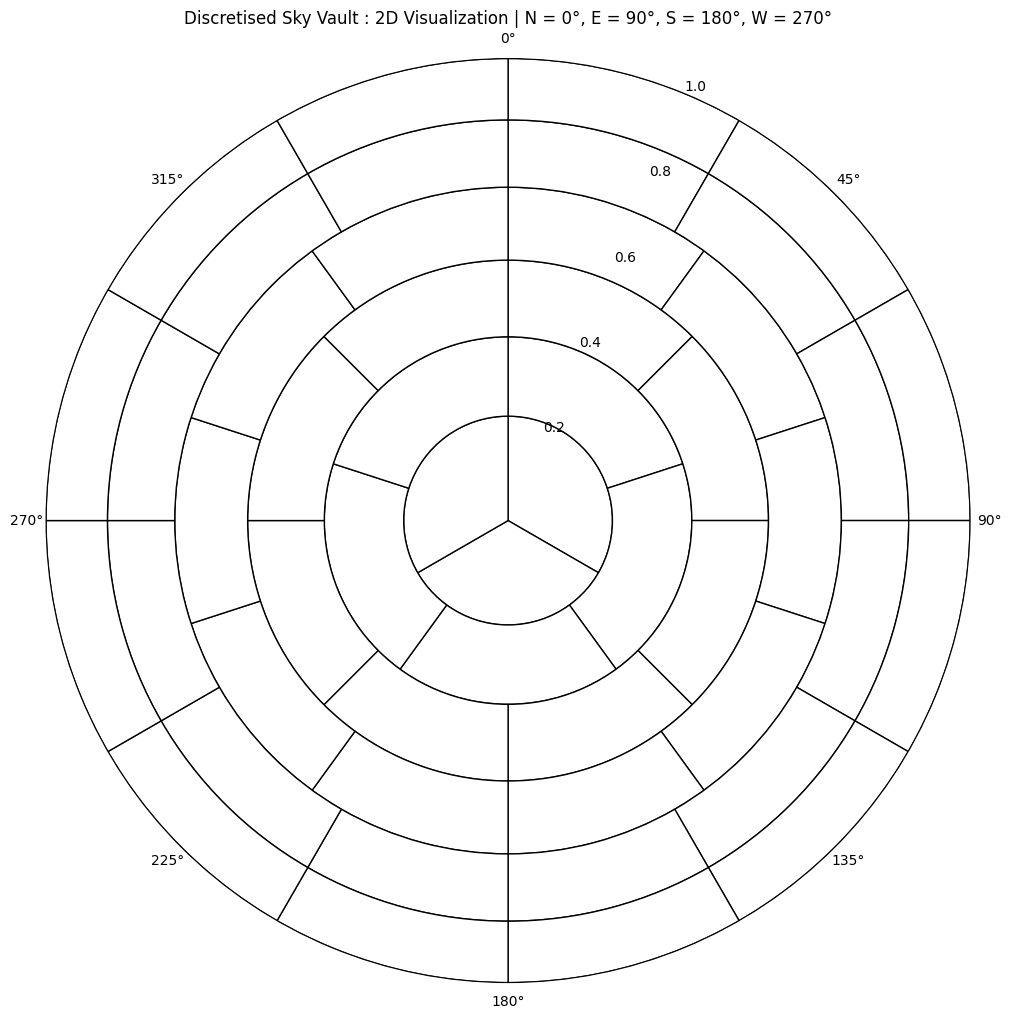

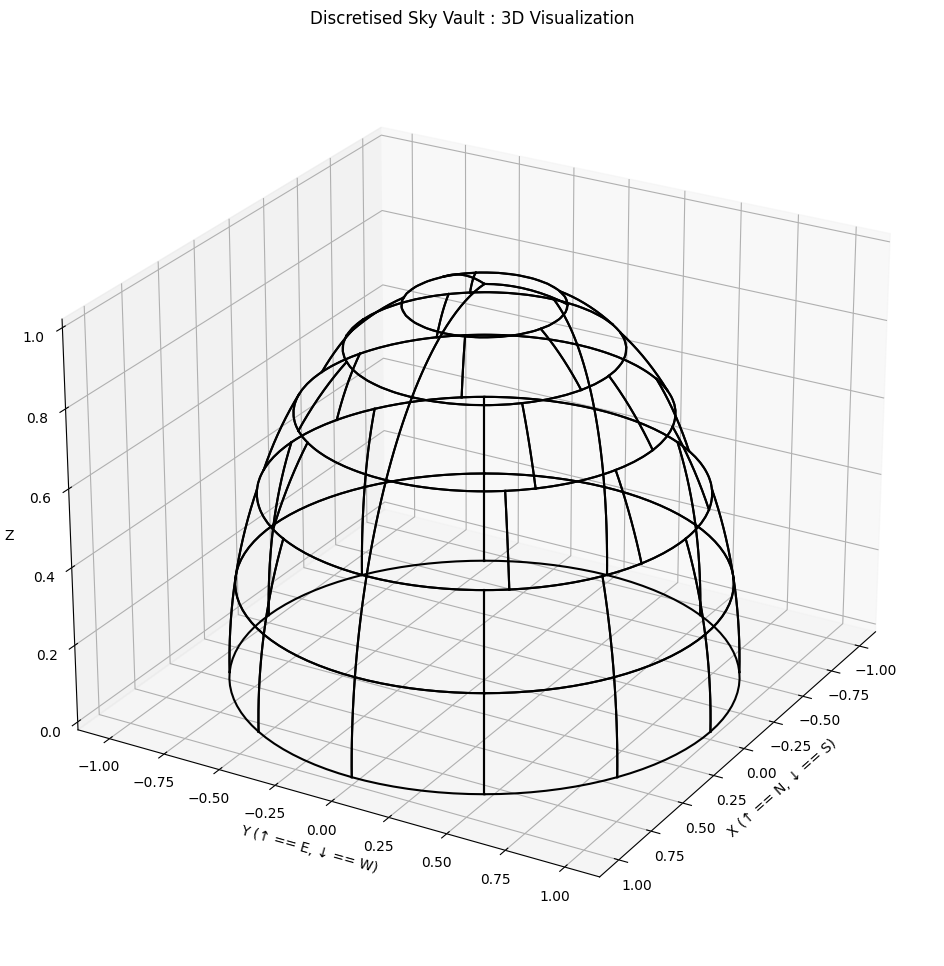

In [3]:
# Initialization of Sky object.
Sky_obj = Sky(Site_obj, num_divisions = 50)

# Visualize the discretised sky vault in 2D. 
Sky_obj.plot_disk_patches(figsize=(12,12))

# Visualize the discretised sky vault in 3D.
Sky_obj.plot_sphere_patches(figsize=(12,12), axis_view=(25, 30))

# (NOTE: Naturally, the higher the number of divisions, the better results.)

###     3) DISCRETISATION OF THE SKY-VAULT

Although, the sky is automatically discretised once we initialize the Sky_obj,
we can always rediscretize it by calling the 'self.discretise' method.

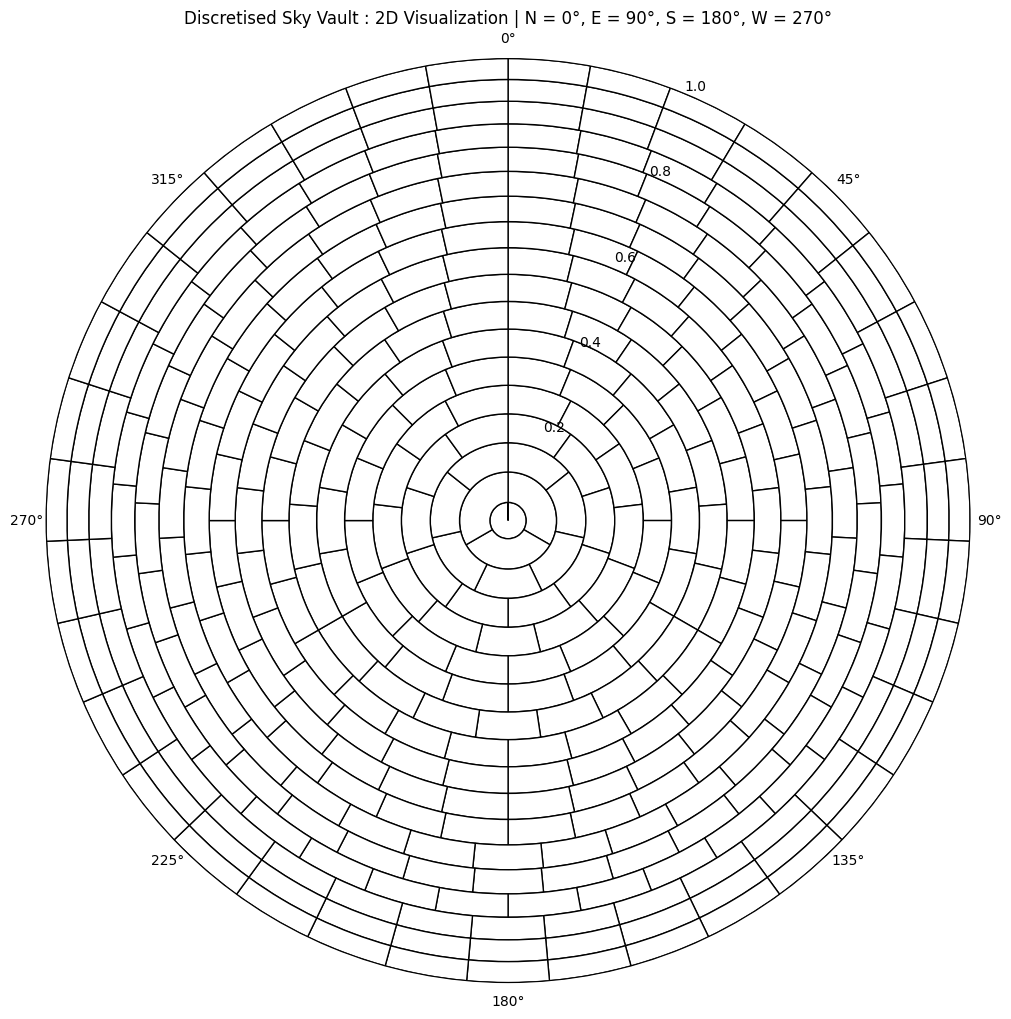

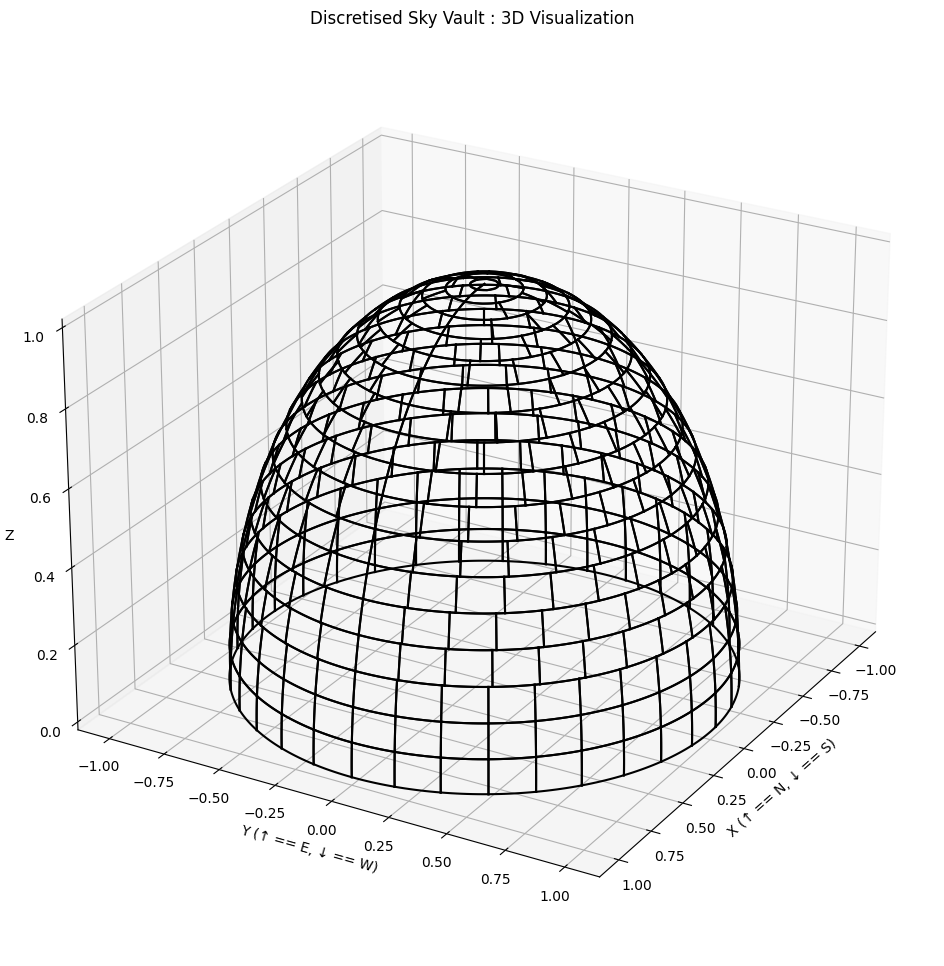

In [4]:
# Re-discretise sky-vault
Sky_obj.discretise(num_divisions = 400)

# Visualize the discretised sky vault in 2D.
Sky_obj.plot_disk_patches(figsize=(12,12))

# Visualize the discretised sky vault in 3D.
Sky_obj.plot_sphere_patches(figsize=(12,12), axis_view=(25, 30))

# NOTE: Doing calling this method after initialization will also errase all other radiation quantities computed up to that point.

###     4) ZONE_DATA AND PATCH_DATA

After initialization, two important attributes within _Sky_obj_ are created.
These are _self.zone_data_ and _self.patch_data_. These are dictionaries which
store all relevant data of each zone and patch of the discretised sky.
We call a 'zone', each sky ring that contains one or more sky patches.
We call a 'patch', each cell that subdivides the sky.

In [5]:
# Let us see the keys of 'self.zone_data' attribute.
print("--- ZONE KEYS ---") 
print(Sky_obj.zone_data.keys())

# These keys are integers which identify each sky zone uniquely.
# The greater the number, the further away the zone is from the sky zenith and the closer
# it is to the sky horizon. We call these numbers 'zone_num'. Let us see the content for one
# of its keys.

print("--- ZONE[KEY] CONTENT ---") 
print(Sky_obj.zone_data[5])

# Now, let us see they keys of 'self.patch_data':
print("--- PATCH KEYS ---") 
print(Sky_obj.patch_data.keys())

# These keys are 2-tuples of integers which together identify each sky patch uniquely.
# The first number is the 'zone_num' each patch belongs to and the second number is its 'patch_num',
# i.e, a number identifying that patch (only) uniquely within that zone. Let us see the content for one
# of its keys.

print("--- PATCH[KEY] CONTENT ---") 
print(Sky_obj.patch_data[(5,1)])

# If you whish to learn more about the specific contents of each dictionary, please
# see the documentation for the method "self.discretise".

--- ZONE KEYS ---
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
--- ZONE[KEY] CONTENT ---
{'num_patches': 16, 'inf_zen': 23.897688903972423, 'sup_zen': 28.979615255186545, 'inf_rad': 0.2927963517929051, 'sup_rad': 0.3538472300429355, 'azimuths': array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ,
       202.5, 225. , 247.5, 270. , 292.5, 315. , 337.5, 360. ]), 'patch_area': 0.015503036623809485, 'zone_area': 0.24804858598095175}
--- PATCH KEYS ---
dict_keys([(0, 0), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6

###    5)    RADIANCES
With this, we can now fairly easily compute an approximation of the 
sky's spectral radiance, as well as its regular radiance, for a given date.
To do this, we make use of the _self.compute_radiances_for_a_date_ method.

C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\radiation\diffuse_radiance_model.py:131: RuntimeWarning: invalid value encountered in divide
  Ce = Gdh/Gh
C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\radiation\diffuse_radiance_model.py:501: RuntimeWarning: divide by zero encountered in divide
  gradation = 1 + a*np.exp(b/np.sin(El_))


{'Siv': array([0.98624458, 1.03452857, 1.07823171, 1.10125785, 1.11417061,
       1.12158523, 1.1257394 , 1.12783628, 1.1285739 , 1.02863375,
       0.98186586, 0.95029232, 0.92503881, 0.9029509 , 0.88265017,
       0.86344879, 0.84496947, 0.8269899 , 0.80937167, 0.79202471,
       0.77488839, 0.76380003, 0.75266546, 0.74149322, 0.73029141,
       0.71906769, 0.70782938, 0.69658353, 0.68533692, 0.67409618,
       0.66286781, 0.65165822, 0.64047381, 0.60485363, 0.57235054,
       0.54217056, 0.51376277, 0.48673353, 0.46079526, 0.43573426,
       0.41138976, 0.38764001, 0.36439272, 0.34157858, 0.31914688,
       0.30991418, 0.30068086, 0.2914471 , 0.28221306, 0.27297894,
       0.26374491, 0.2545112 , 0.24527801, 0.23604559, 0.22681421,
       0.21758415, 0.20835576, 0.20461276, 0.20086815, 0.19712196,
       0.19337423, 0.18962497, 0.18587421, 0.18212196, 0.17836823,
       0.17461301, 0.1708563 , 0.16709808, 0.16333832, 0.17870895,
       0.19515881, 0.21263108, 0.23110281, 0.25058021,

C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\Sky.py:1167: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[nr,nc].set_yticklabels([80, 70, 60, 50, 40, 30, 20, 10, 0])


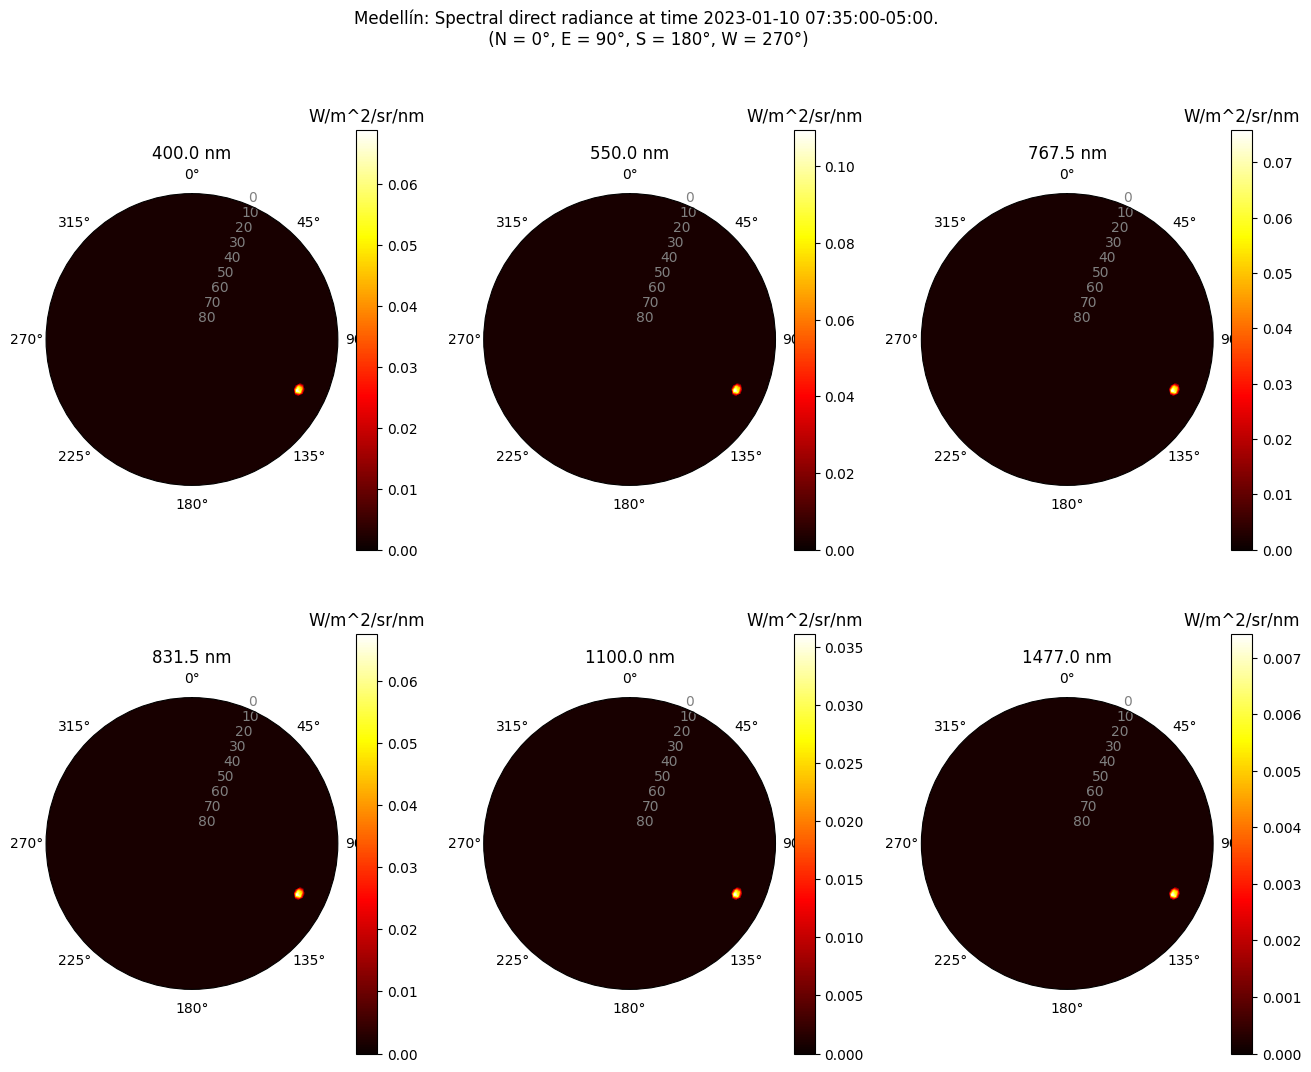

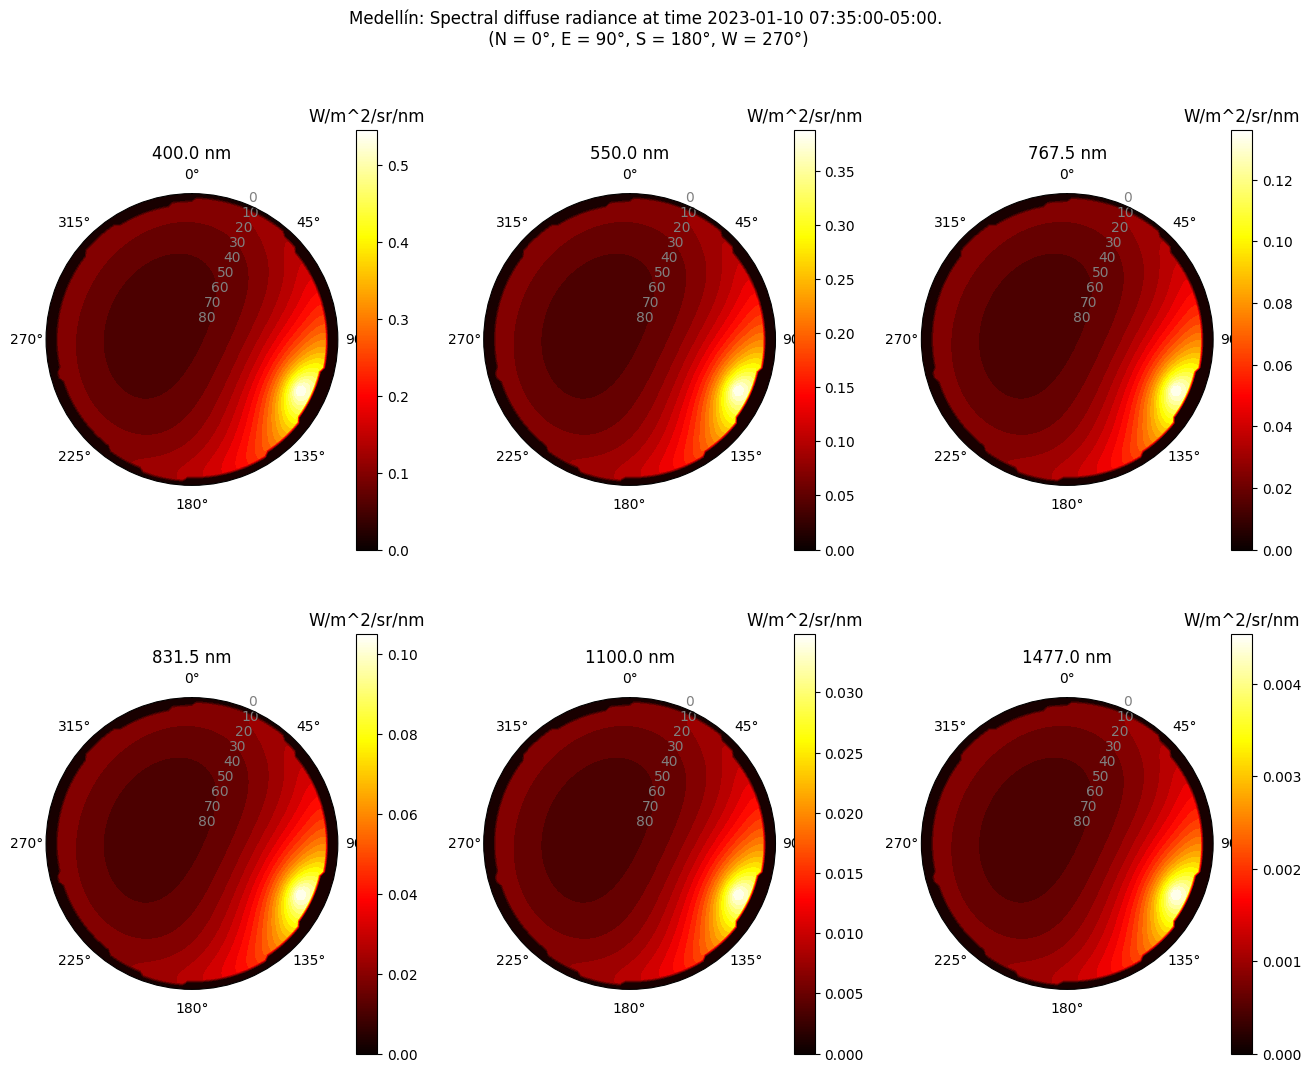

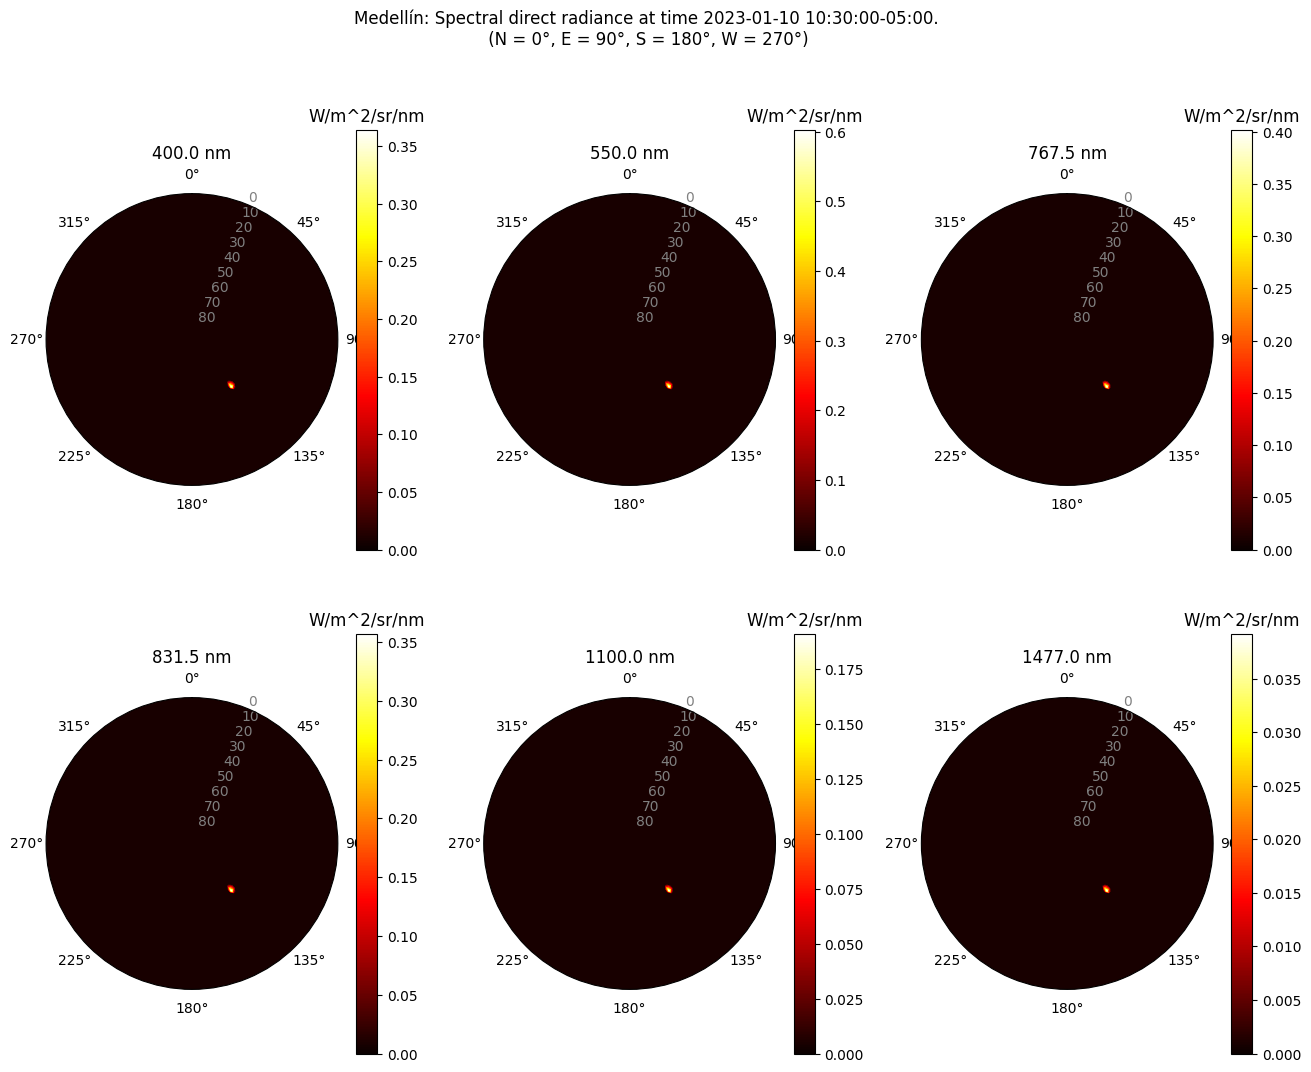

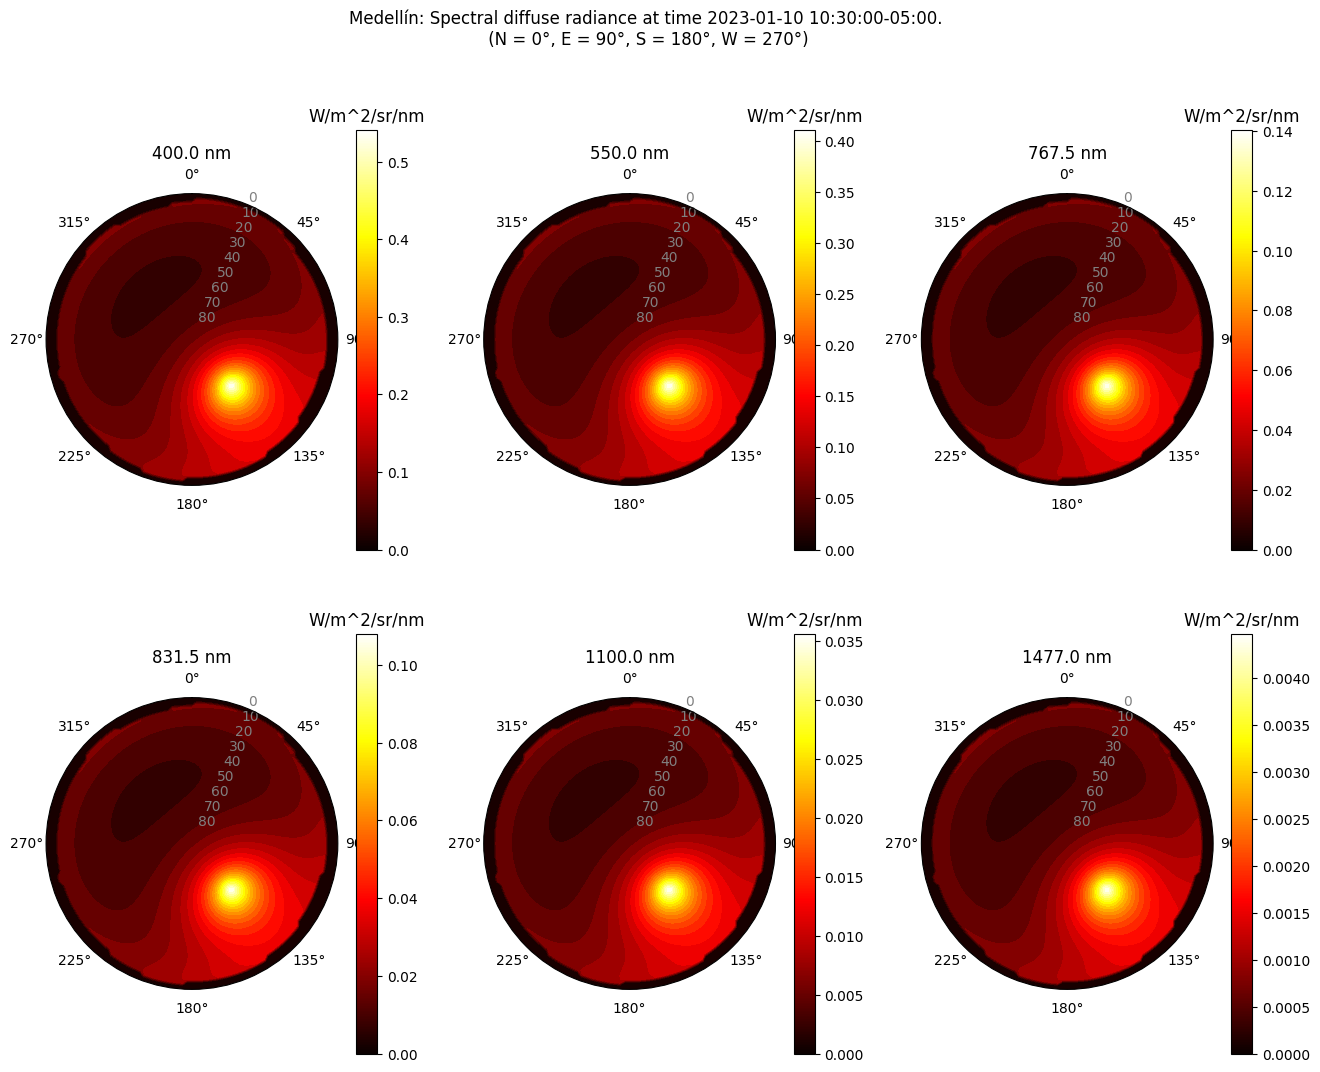

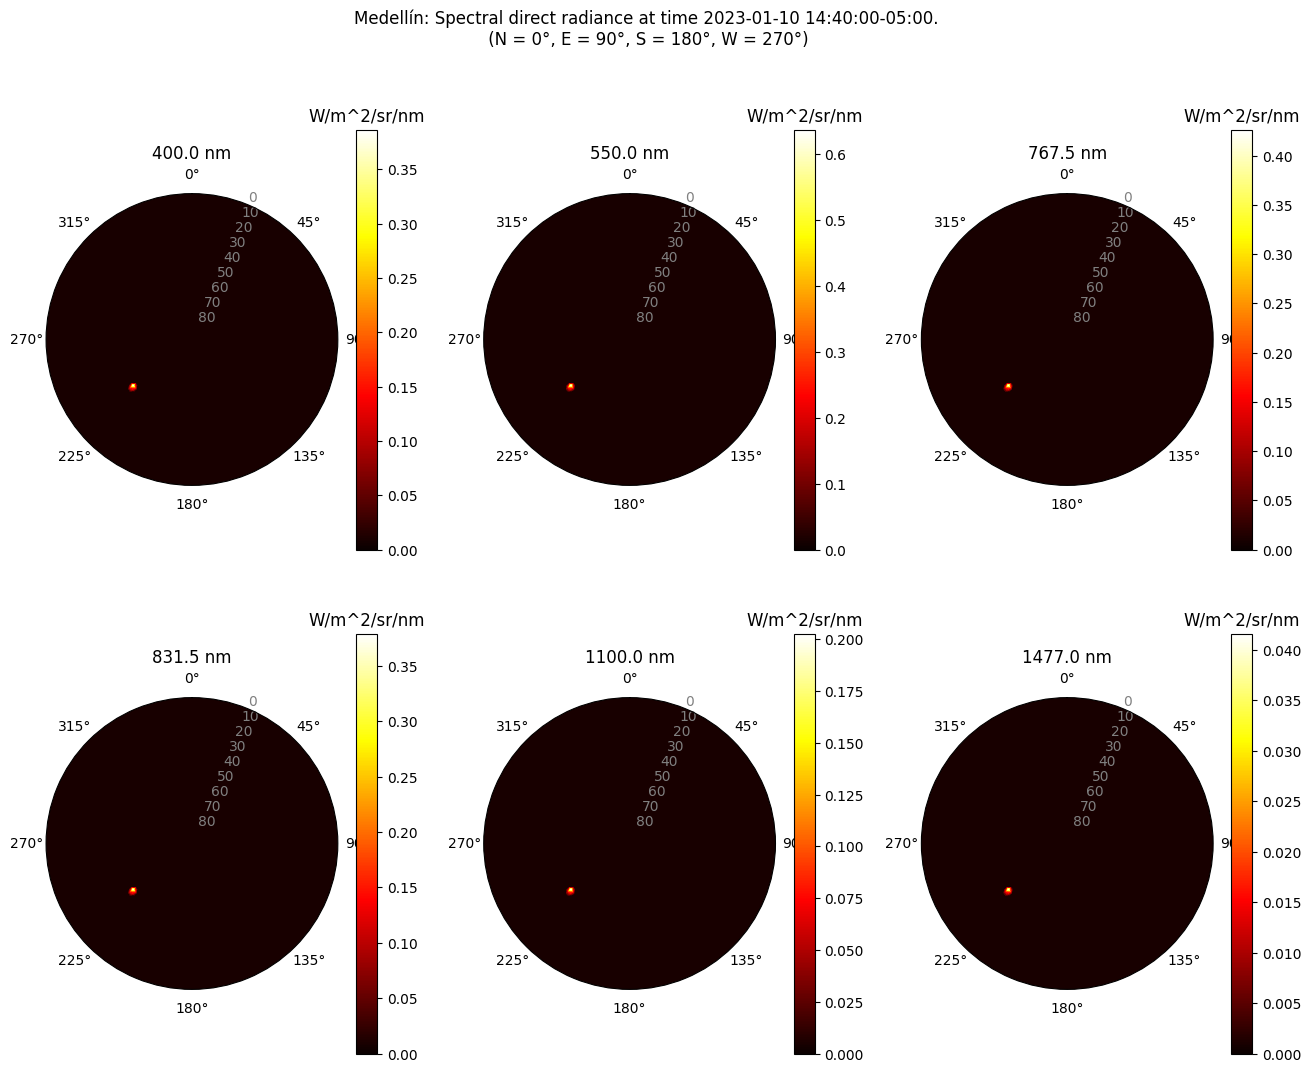

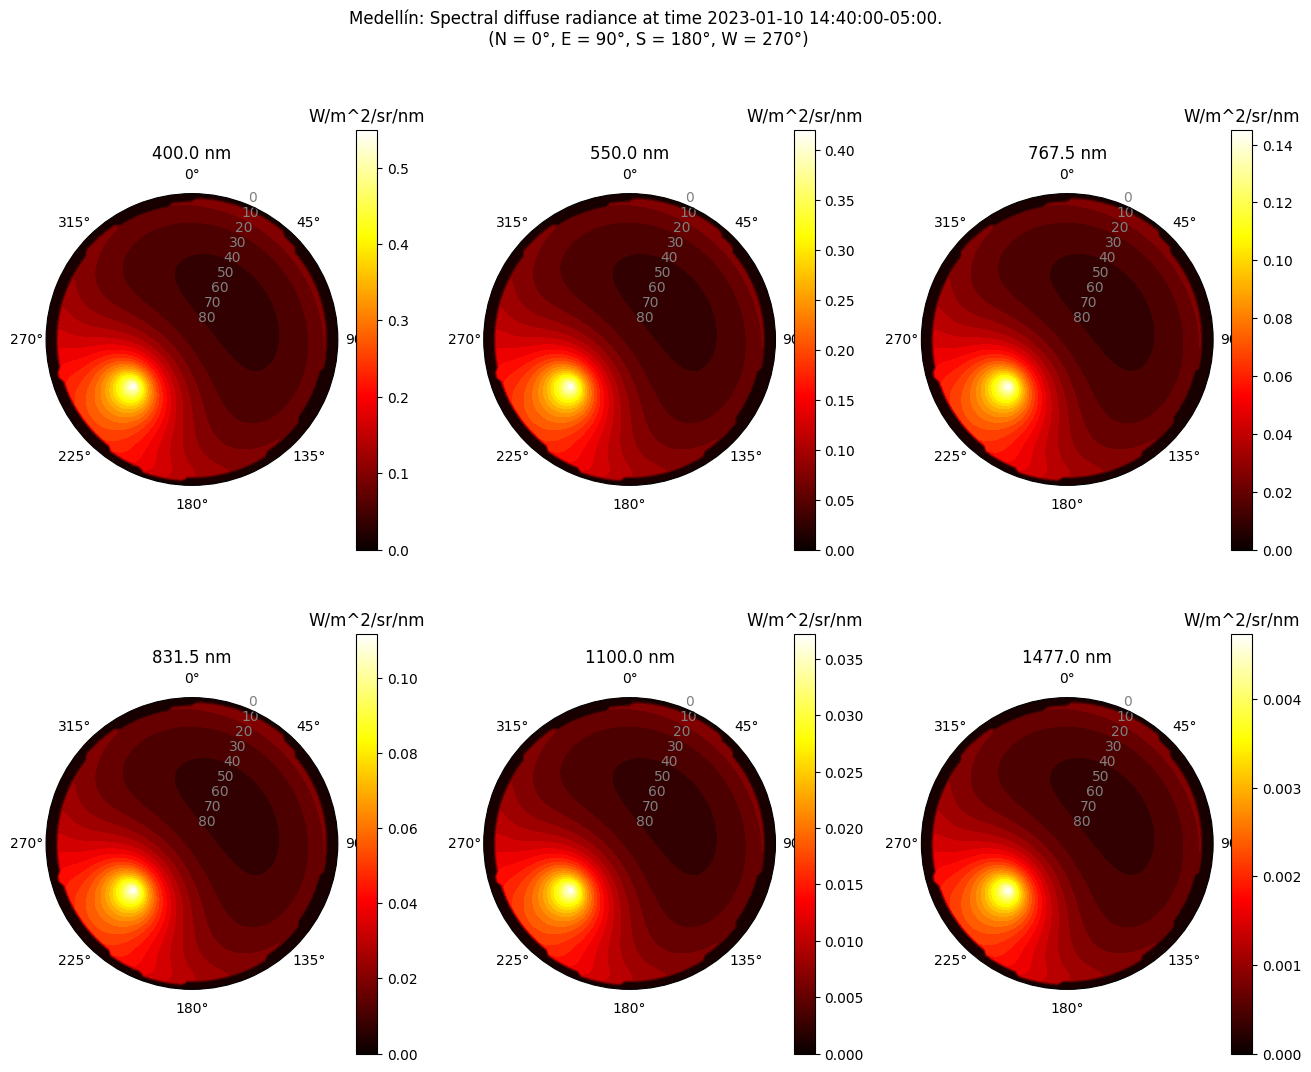

C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\Sky.py:1245: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([80, 70, 60, 50, 40, 30, 20, 10, 0])


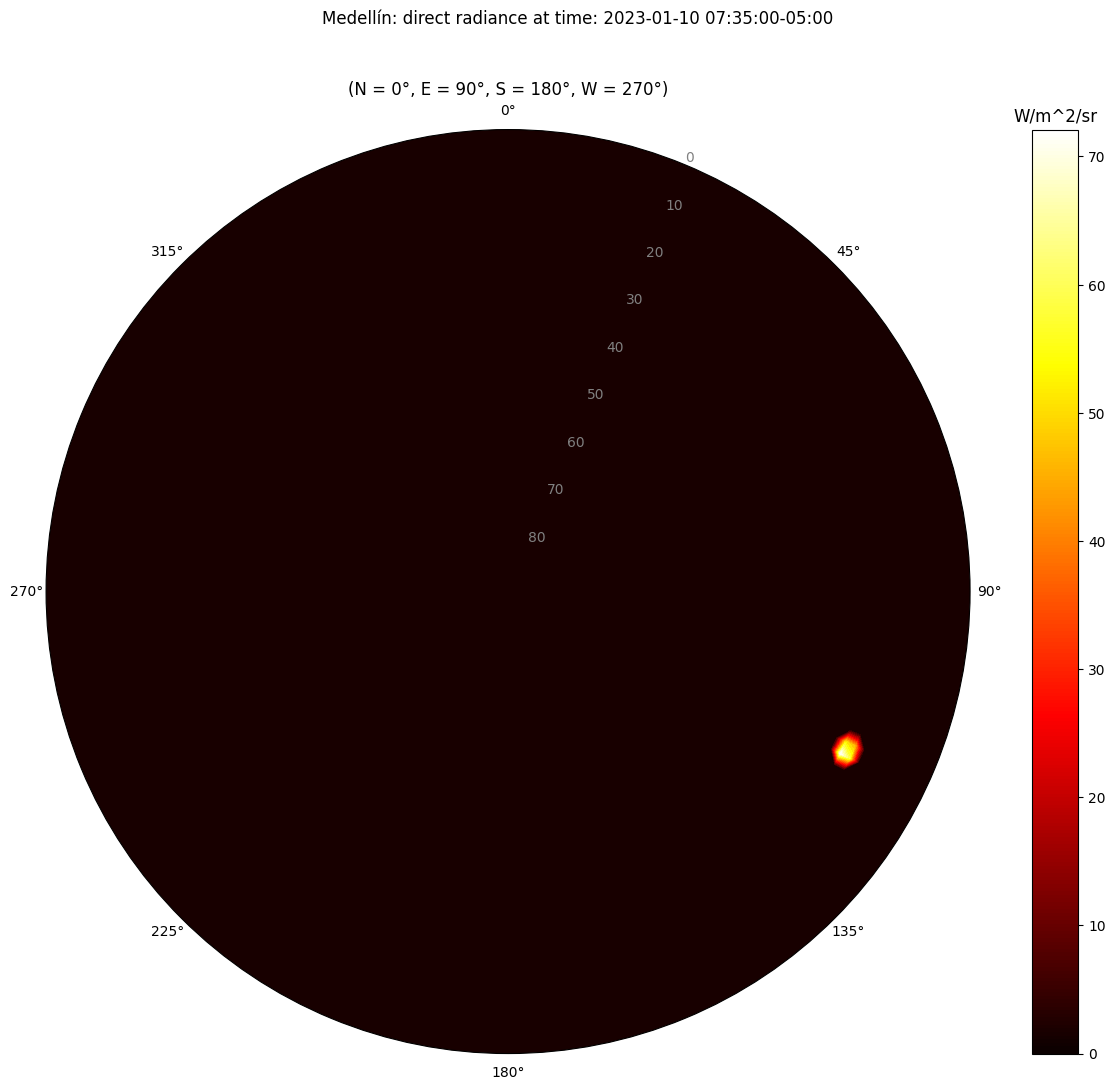

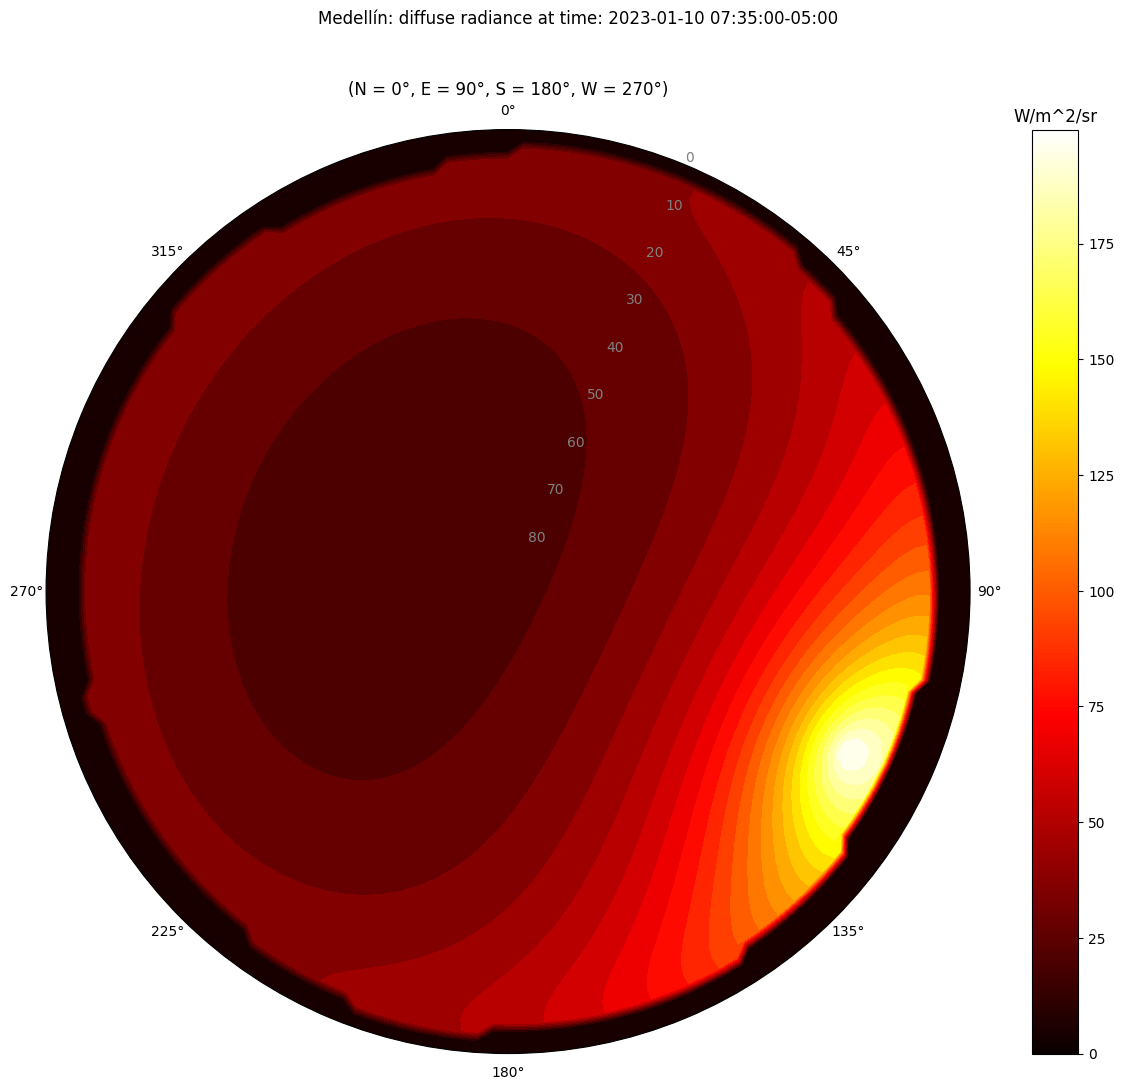

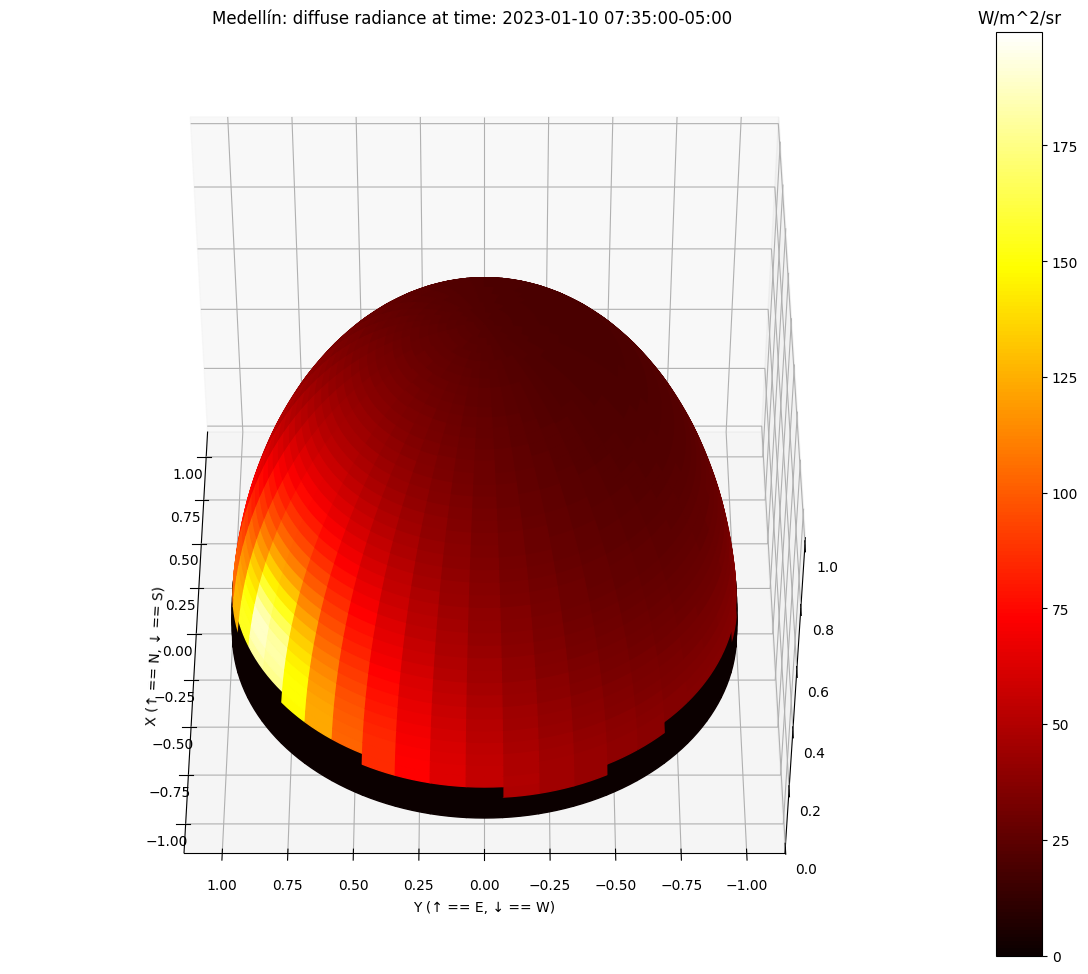

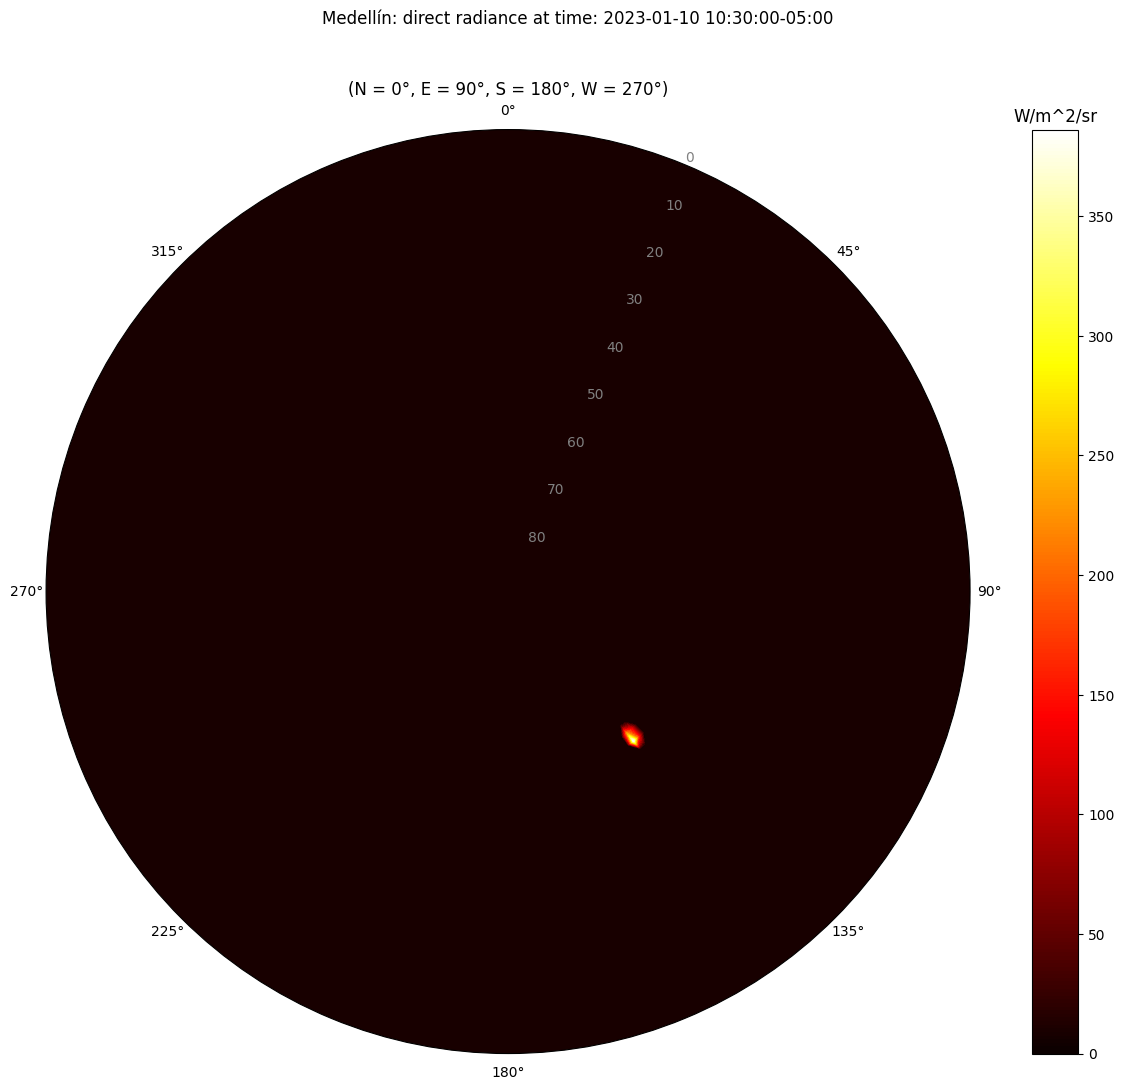

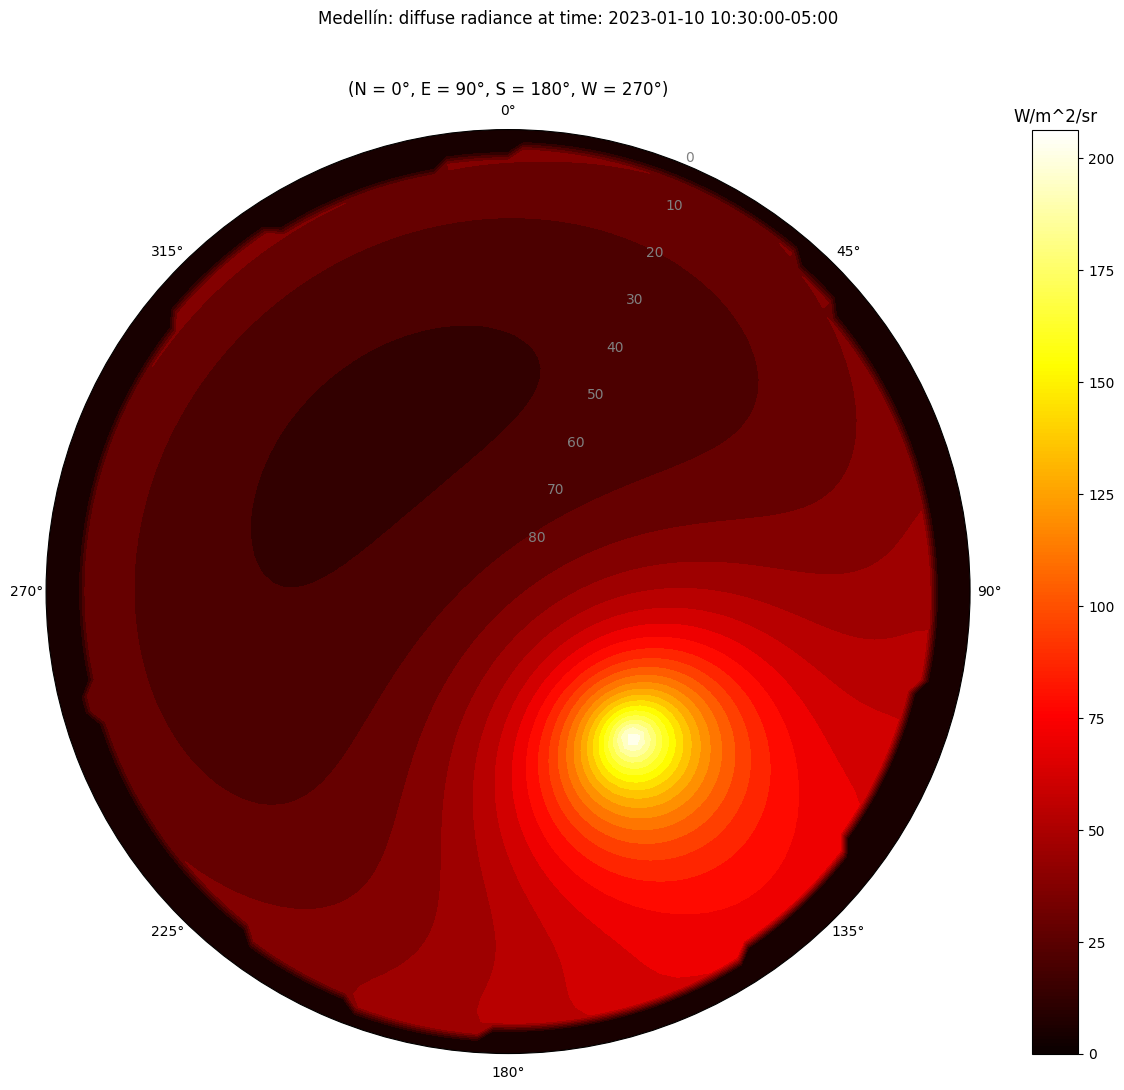

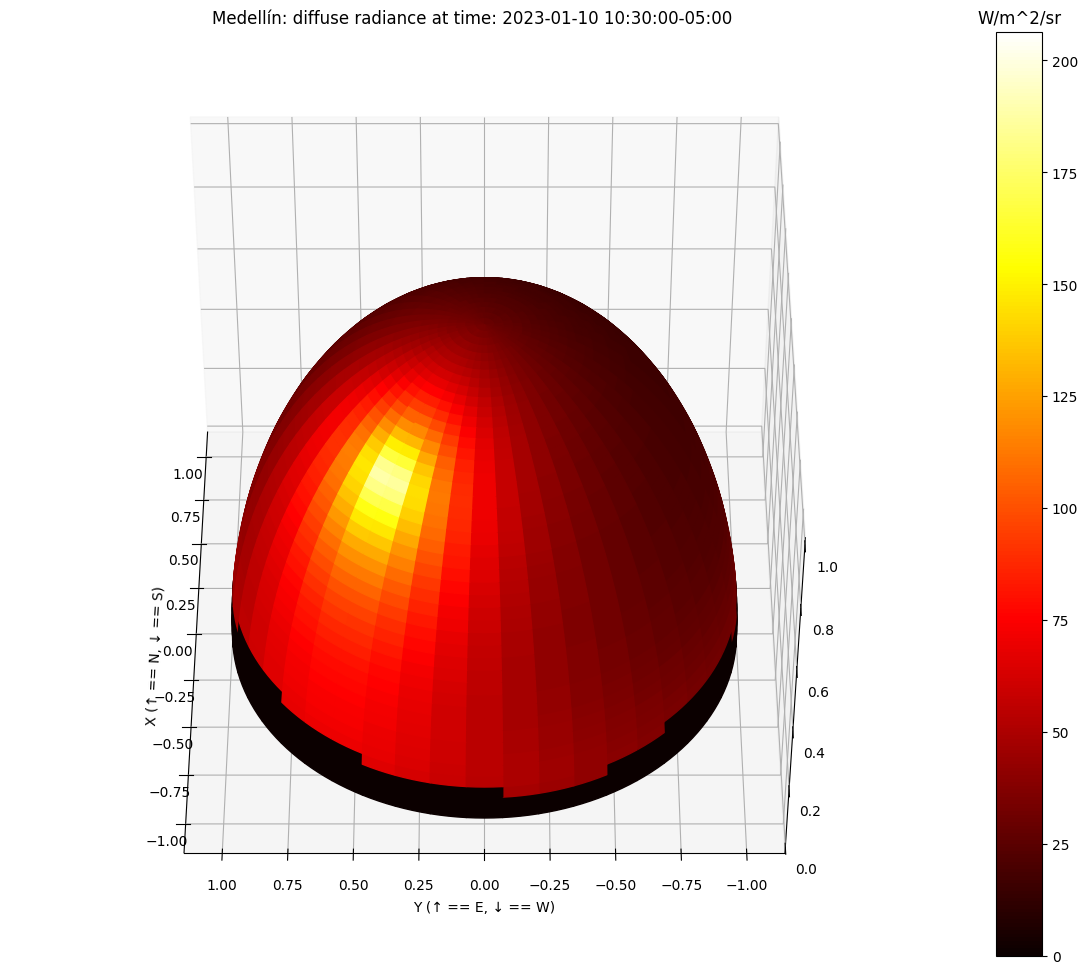

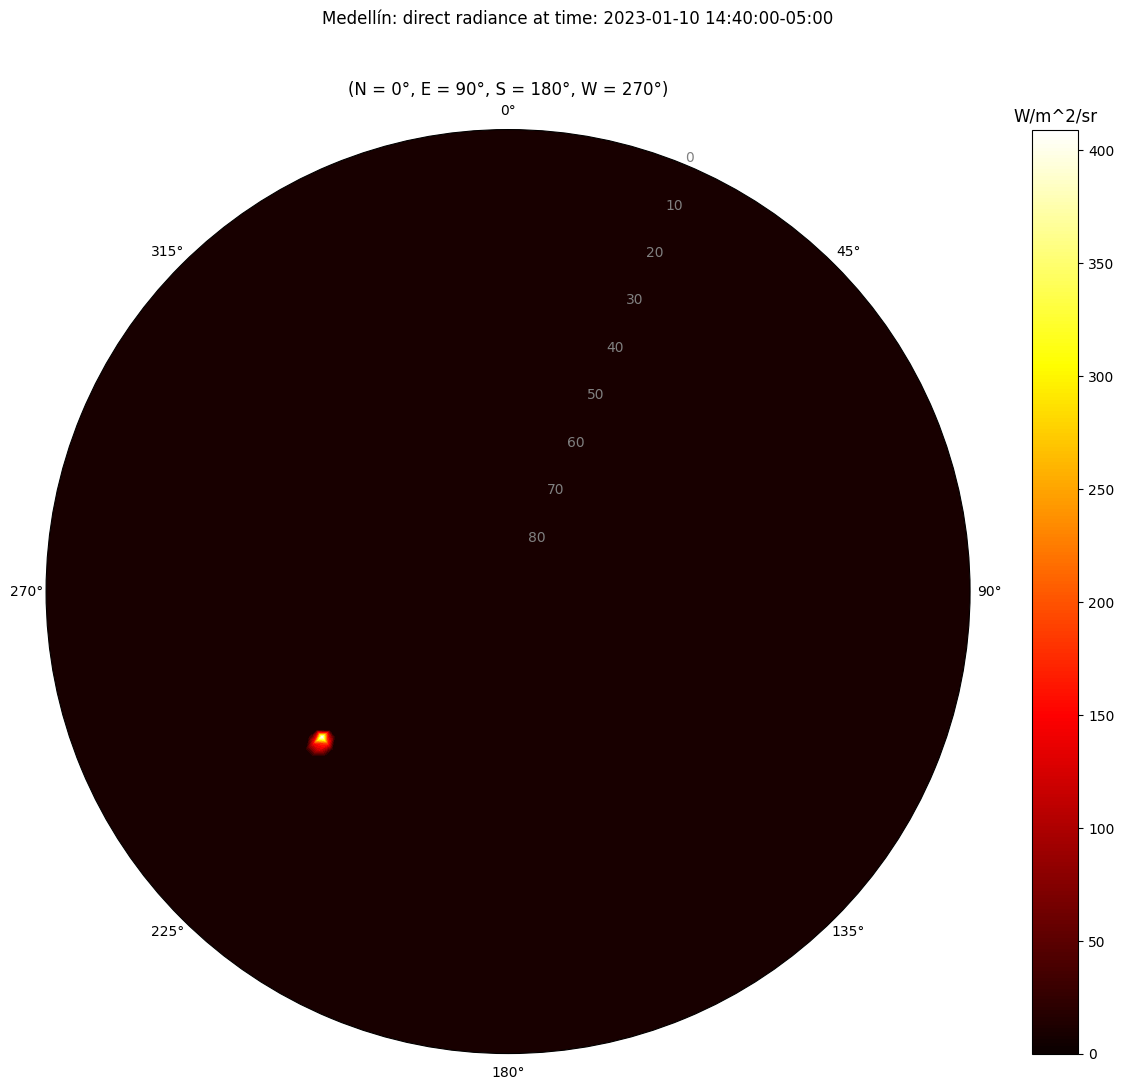

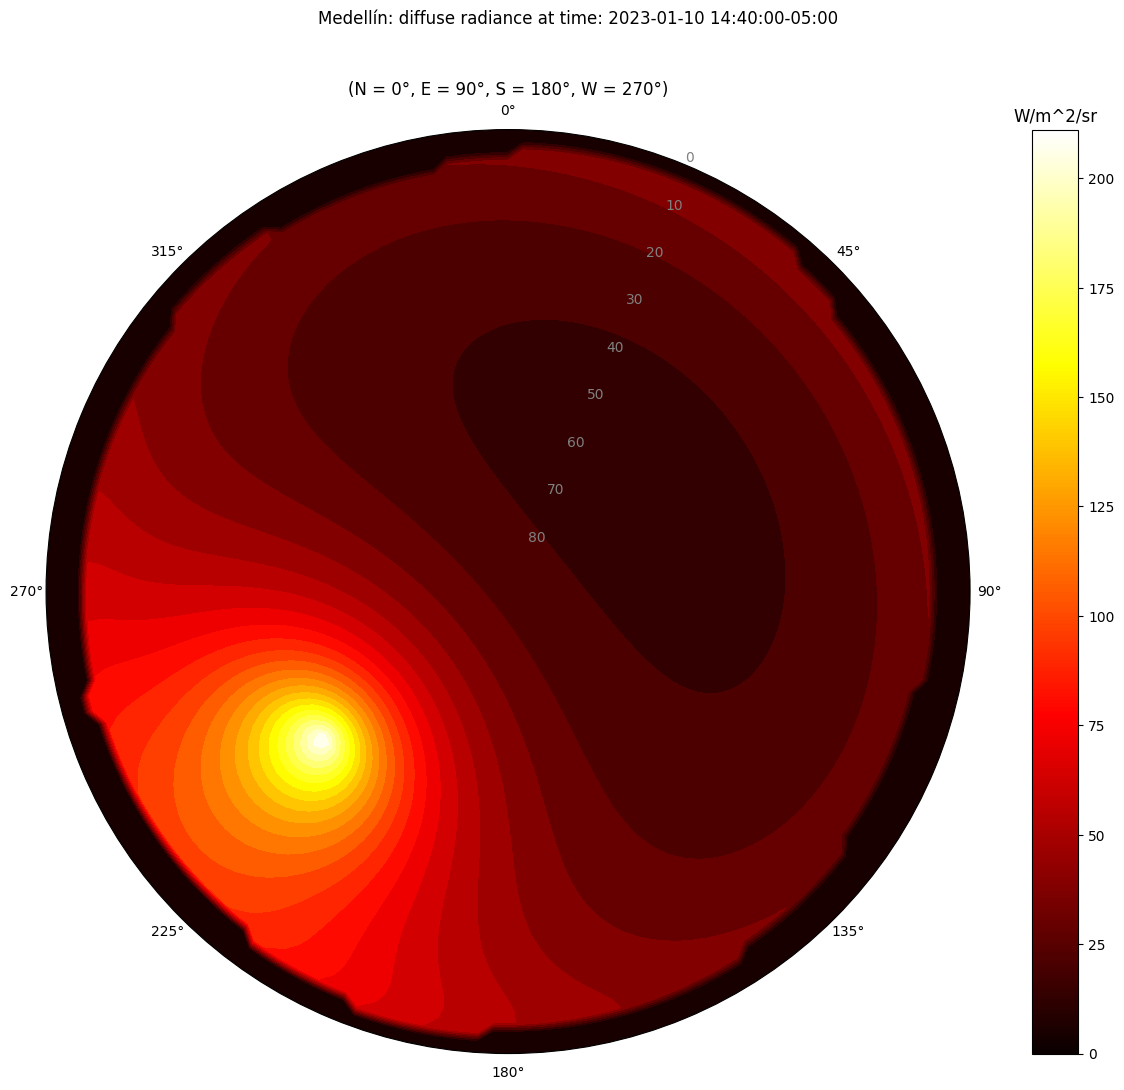

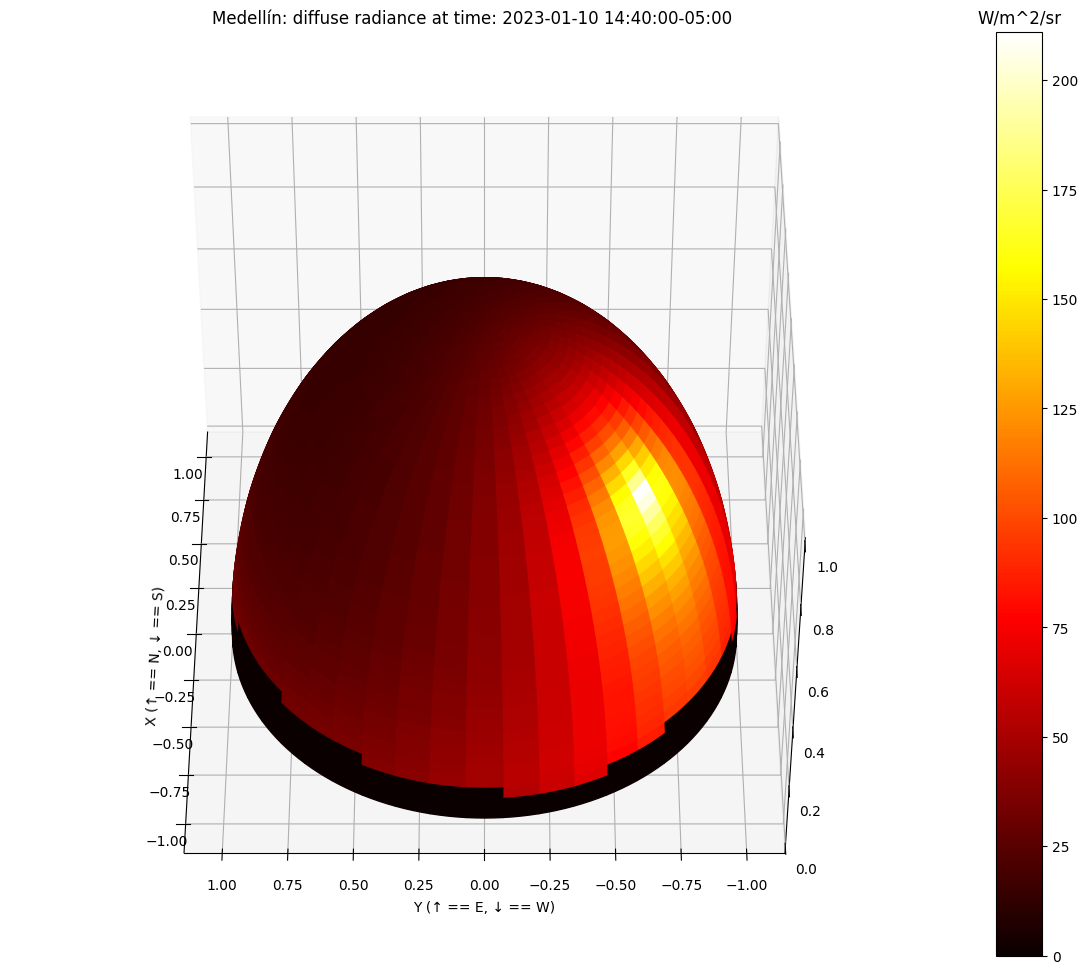

Text(0.5, 1.0, "Igawa's clear sky index across time")

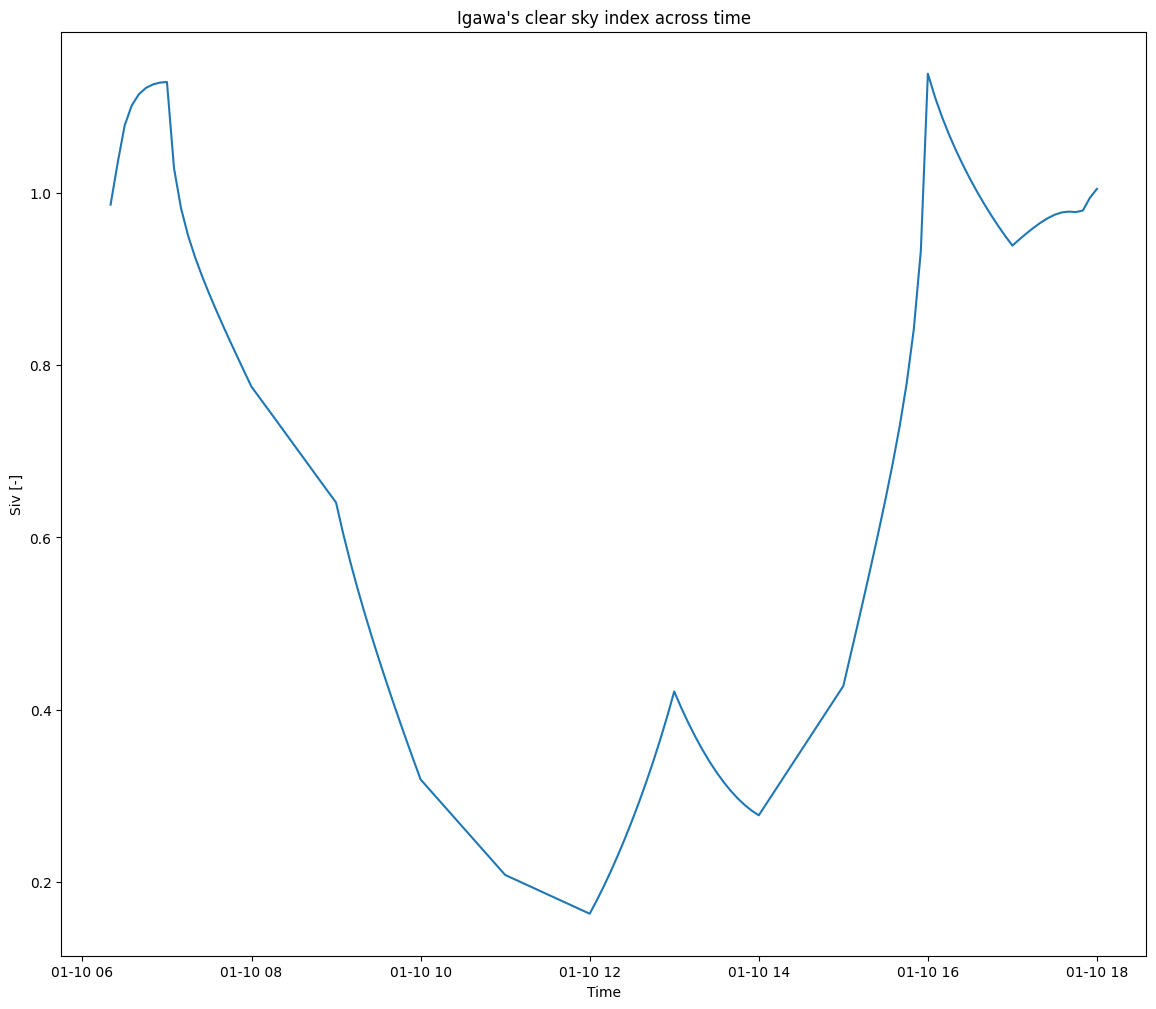

In [6]:
# (NOTE: the date chosen must be present in 'Site_obj.simulation_time_data.keys()')

# COMPUTE SPECTRAL RADIANCE AND RADIANCE
Sky_obj.compute_radiances_for_a_date(year = 2023, 
                                     month = 1, 
                                     day = 10, 
                                     nel = 46, 
                                     naz = 181, 
                                     num_iterations = 500, 
                                     use_site_horizon=True)

# The results are stored in the attribute 'self.radiance_res':
print(Sky_obj.radiances)

# We can also plot the results for a particular time of the date simulated.

# PLOT SPECTRAL RADIANCE
for nt in [15, 50, 100]: 
    Sky_obj.plot_spectral_radiance_for_a_date(component="direct",  nt=nt)
    Sky_obj.plot_spectral_radiance_for_a_date(component="diffuse", nt=nt)

# PLOT RADIANCE
for nt in [15, 50, 100]: 
    Sky_obj.plot_radiance_for_a_date(component="direct",  nt=nt)
    Sky_obj.plot_radiance_for_a_date(component="diffuse", nt=nt)
    Sky_obj.plot_radiance_for_a_date(component="diffuse", nt=nt, projection = "sphere")

# PLOT IGAWA'S SKY INDEX
fig = plt.figure(figsize=(14,12))
plt.plot(Sky_obj.radiances["DatetimeIndex_obj"], Sky_obj.radiances["Siv"])
plt.xlabel("Time")
plt.ylabel("Siv [-]")
plt.title("Igawa's clear sky index across time")

###     6) (SPECTRAL) RADIANT EXPOSURE VECTORS

We can now compute the spectral and regular exposure vectors for the discretised
sky. Each sky patch has one spectral and one regular radiant exposure vectors.
The magnitude of these vectors (be it spectral or regular) tells us the total
amount energy (per unit area per unit wavelength in the first case, while and just per unit area
in the second case) that is emitted by that sky patch, for a given time interval. The direction
of these vectors points to the 'center of radiation' of the sky patch. That is, the weighted average 
of emission direction. We can use these vectors (be it spectral or regular) in order to perform 
computations of absorption and direction optimization, among other things.

C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\radiation\diffuse_radiance_model.py:202: RuntimeWarning: divide by zero encountered in divide
  Cle = (1 - Ce)/(1 - Ces)
C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\radiation\diffuse_radiance_model.py:202: RuntimeWarning: invalid value encountered in divide
  Cle = (1 - Ce)/(1 - Ces)
C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\Sky.py:2008: RuntimeWarning: invalid value encountered in divide
  local_direct_spectral_exposure_uvec_spectrally_avgd /=\
C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\Sky.py:2384: RuntimeWarning: invalid value encountered in divide
  new_direct_unit_vector = new_direct_vector/new_direct_magnitude


--- self.exposure_vectors KEYS ---
dict_keys(['spectral_direct', 'spectral_diffuse', 'spectral_global', 'spectral_direct_mag', 'spectral_diffuse_mag', 'spectral_global_mag', 'spectral_direct_unit_savgd', 'spectral_diffuse_unit_savgd', 'spectral_global_unit_savgd', 'wavelengths', 'direct', 'diffuse', 'global', 'direct_mag', 'diffuse_mag', 'global_mag', 'direct_unit', 'diffuse_unit', 'global_unit'])
--- self.patch_data['exposure'] KEYS ---
dict_keys(['spectral_direct', 'spectral_diffuse', 'spectral_global', 'wavelengths', 'direct', 'diffuse', 'global'])


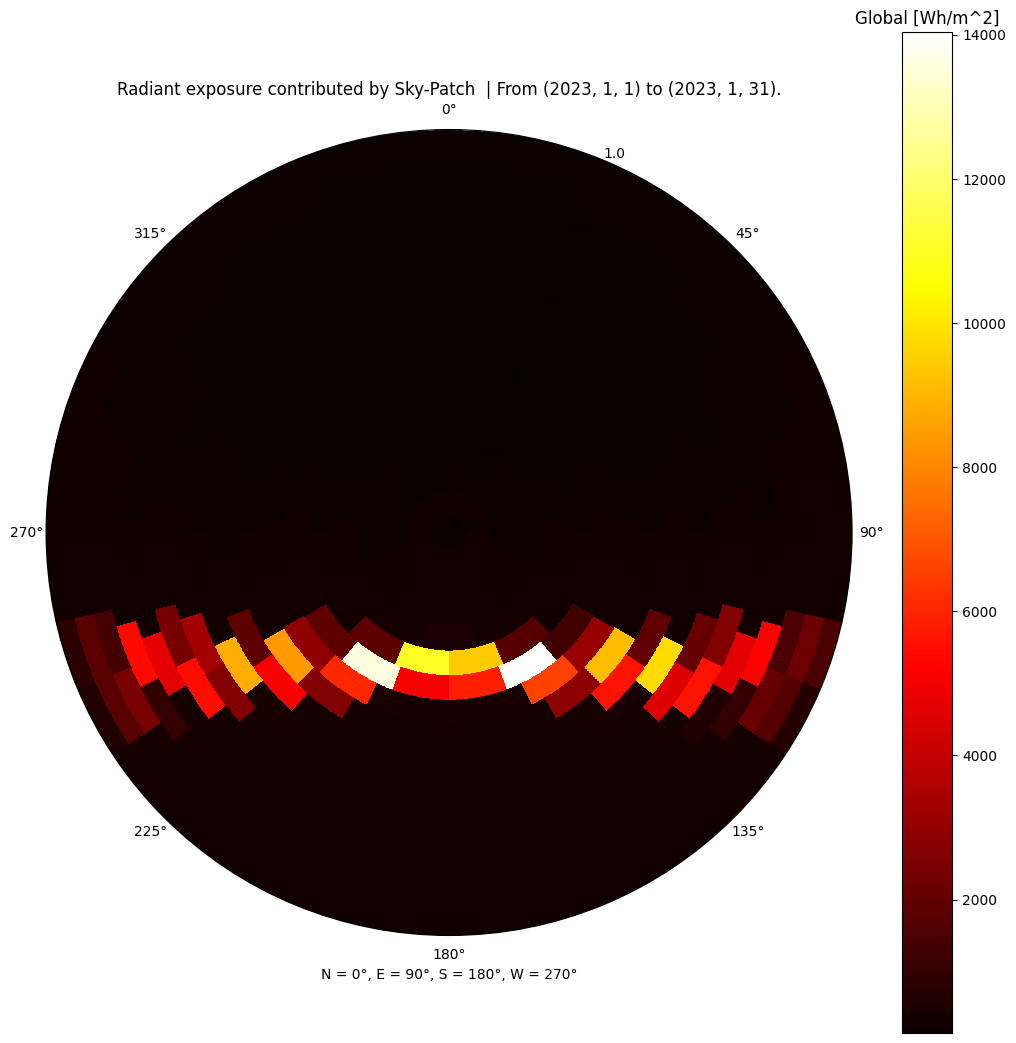

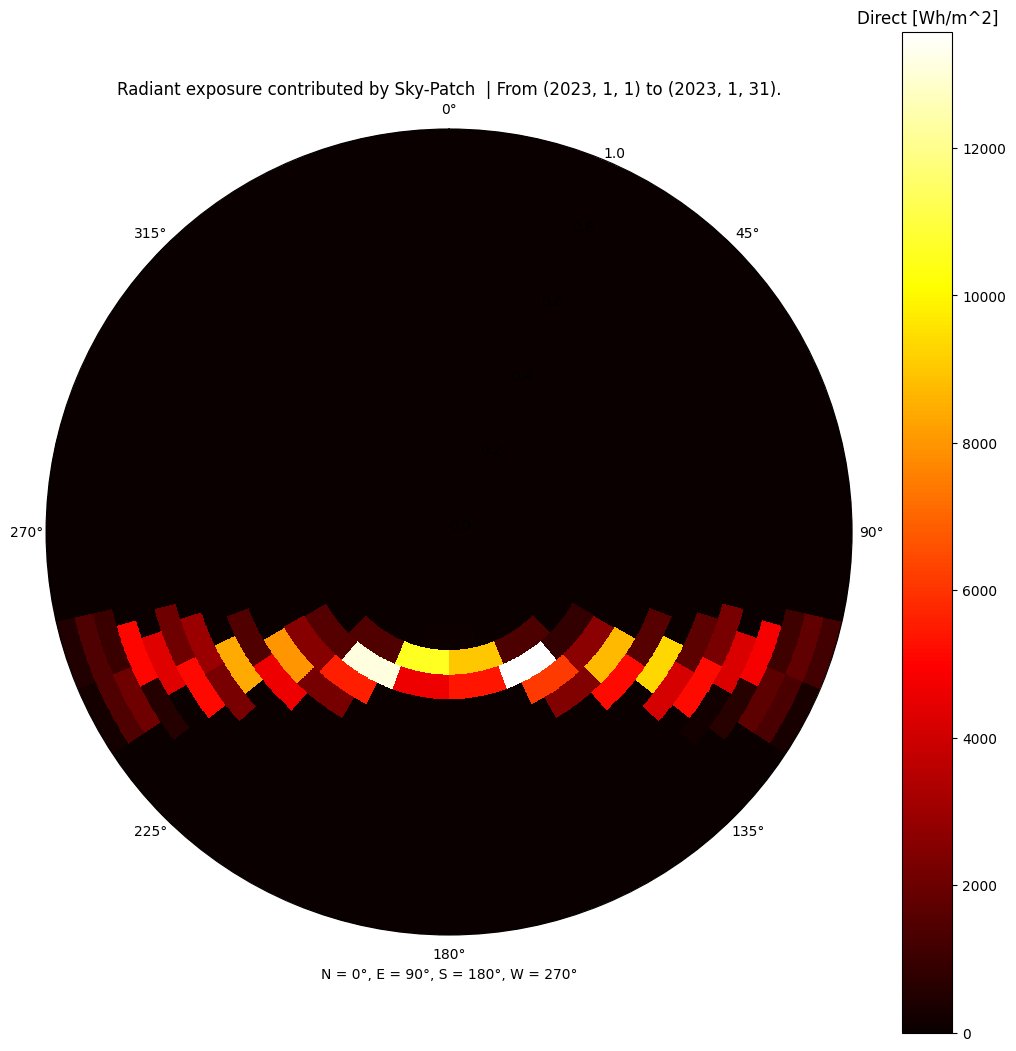

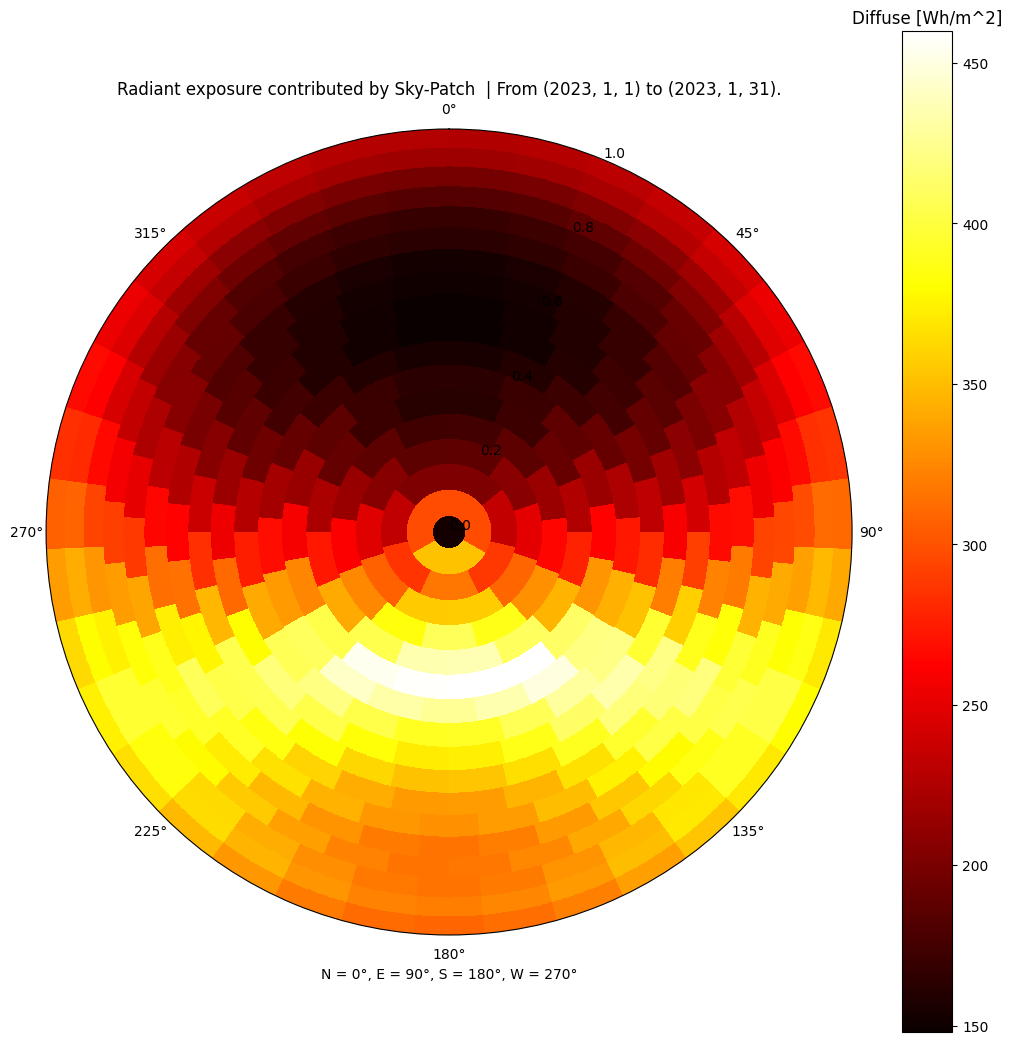

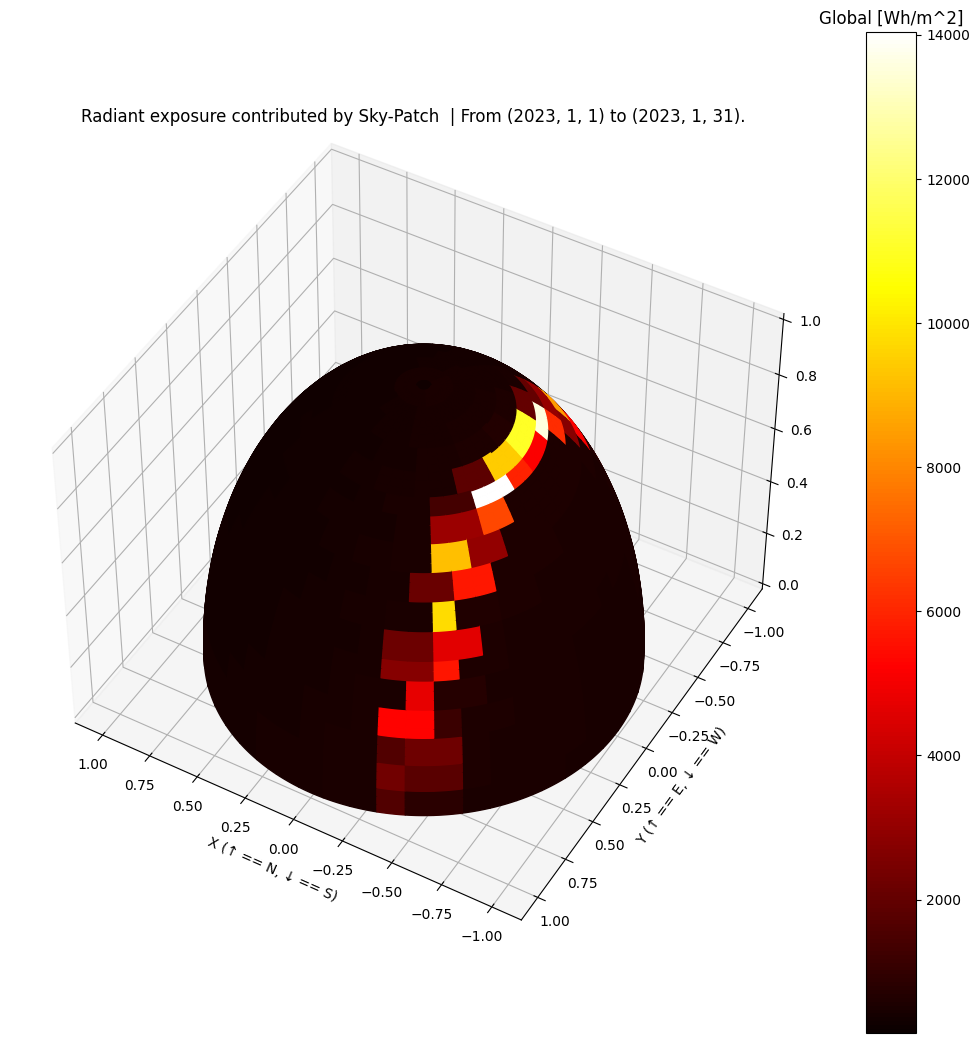

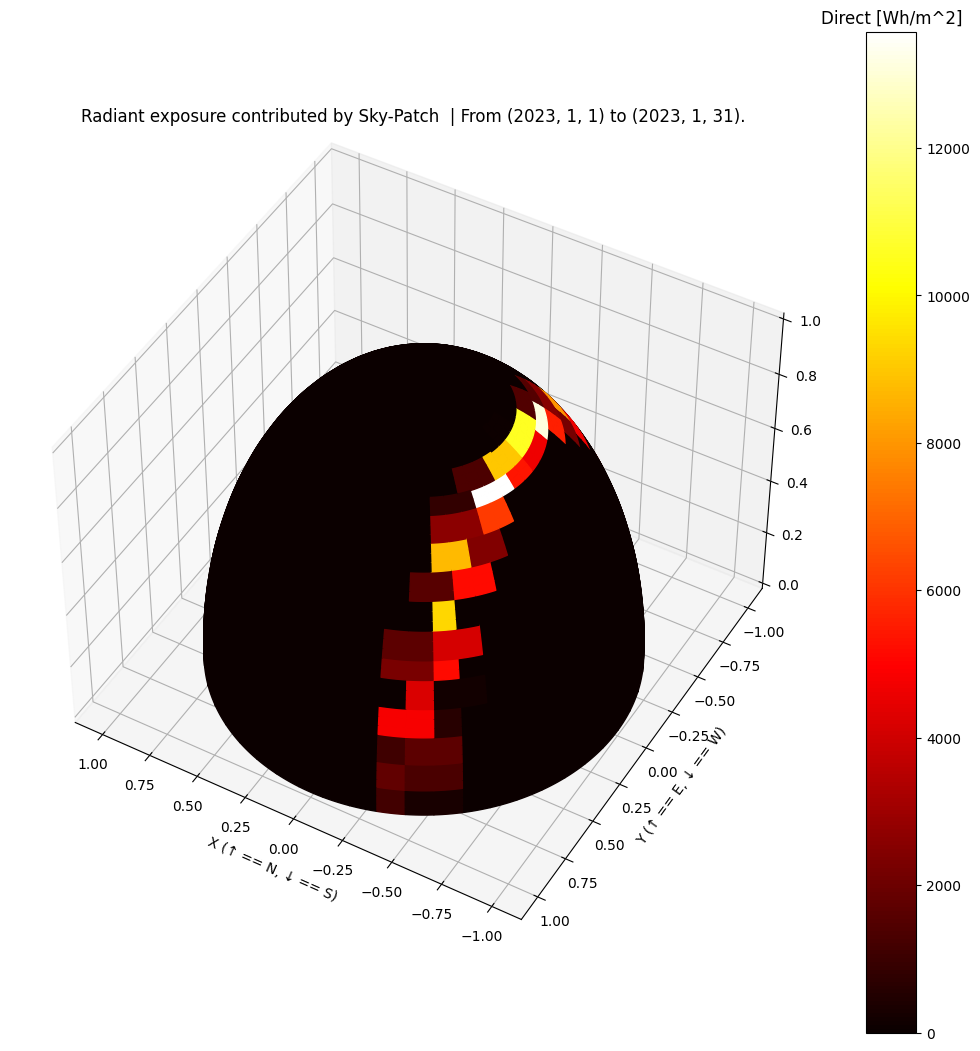

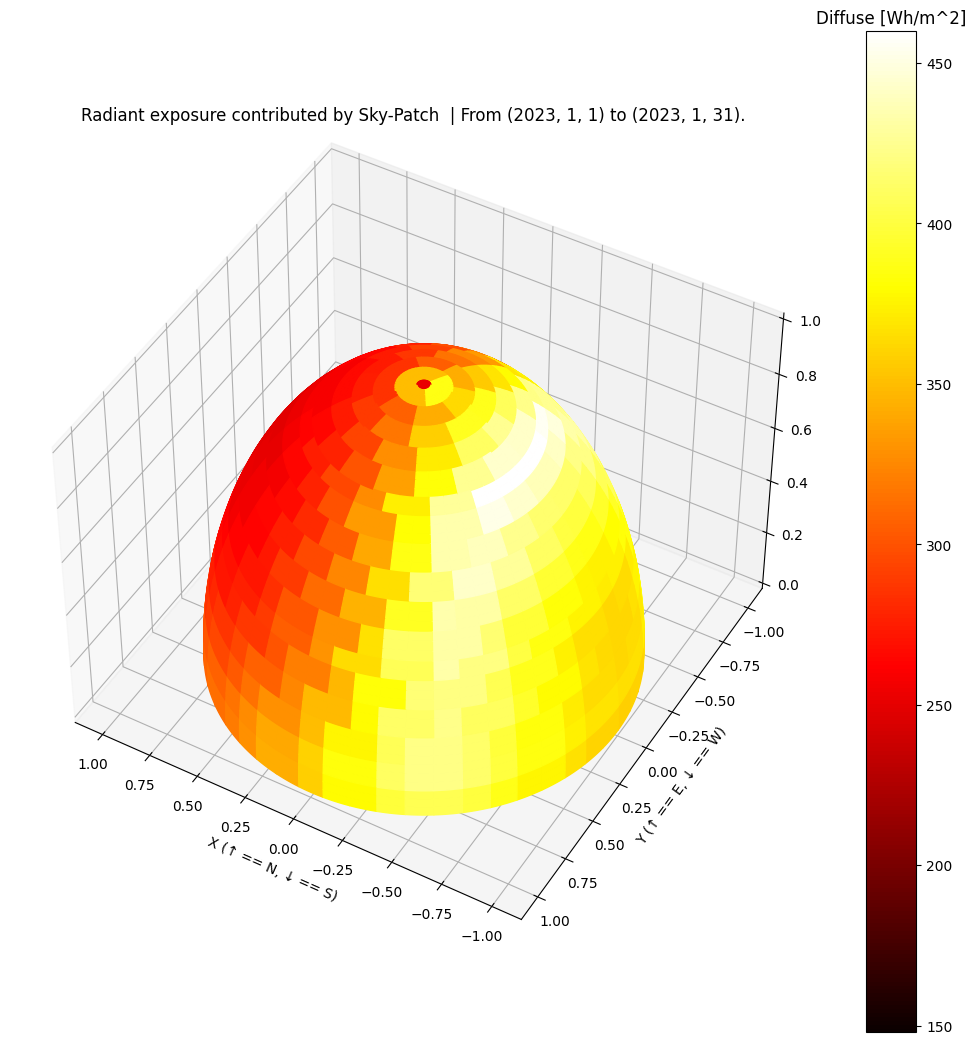

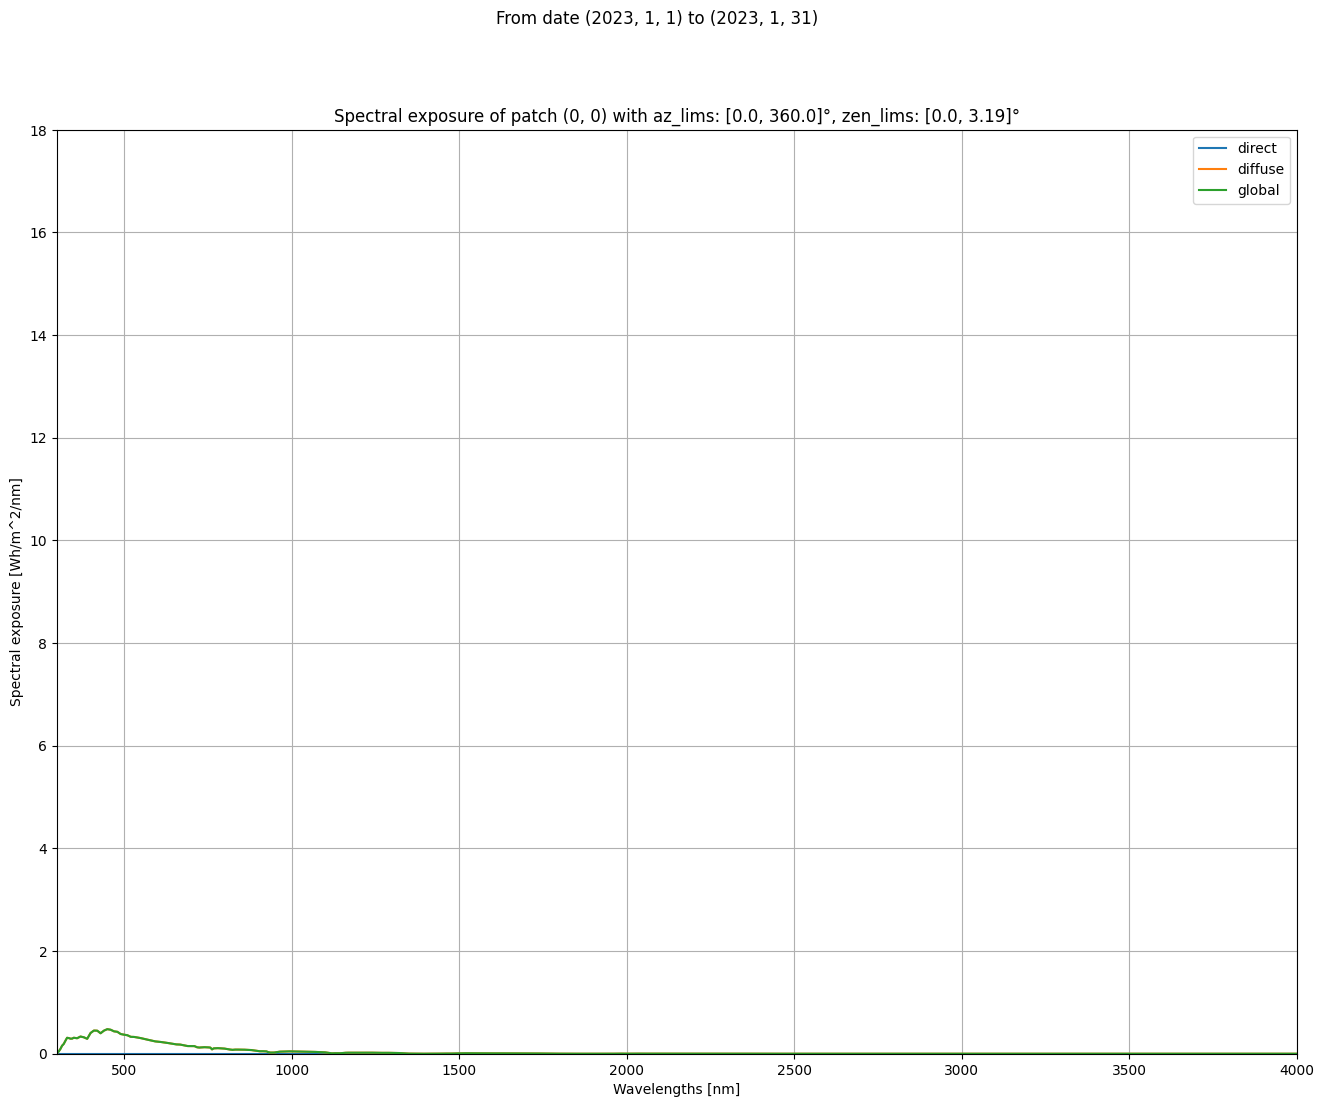

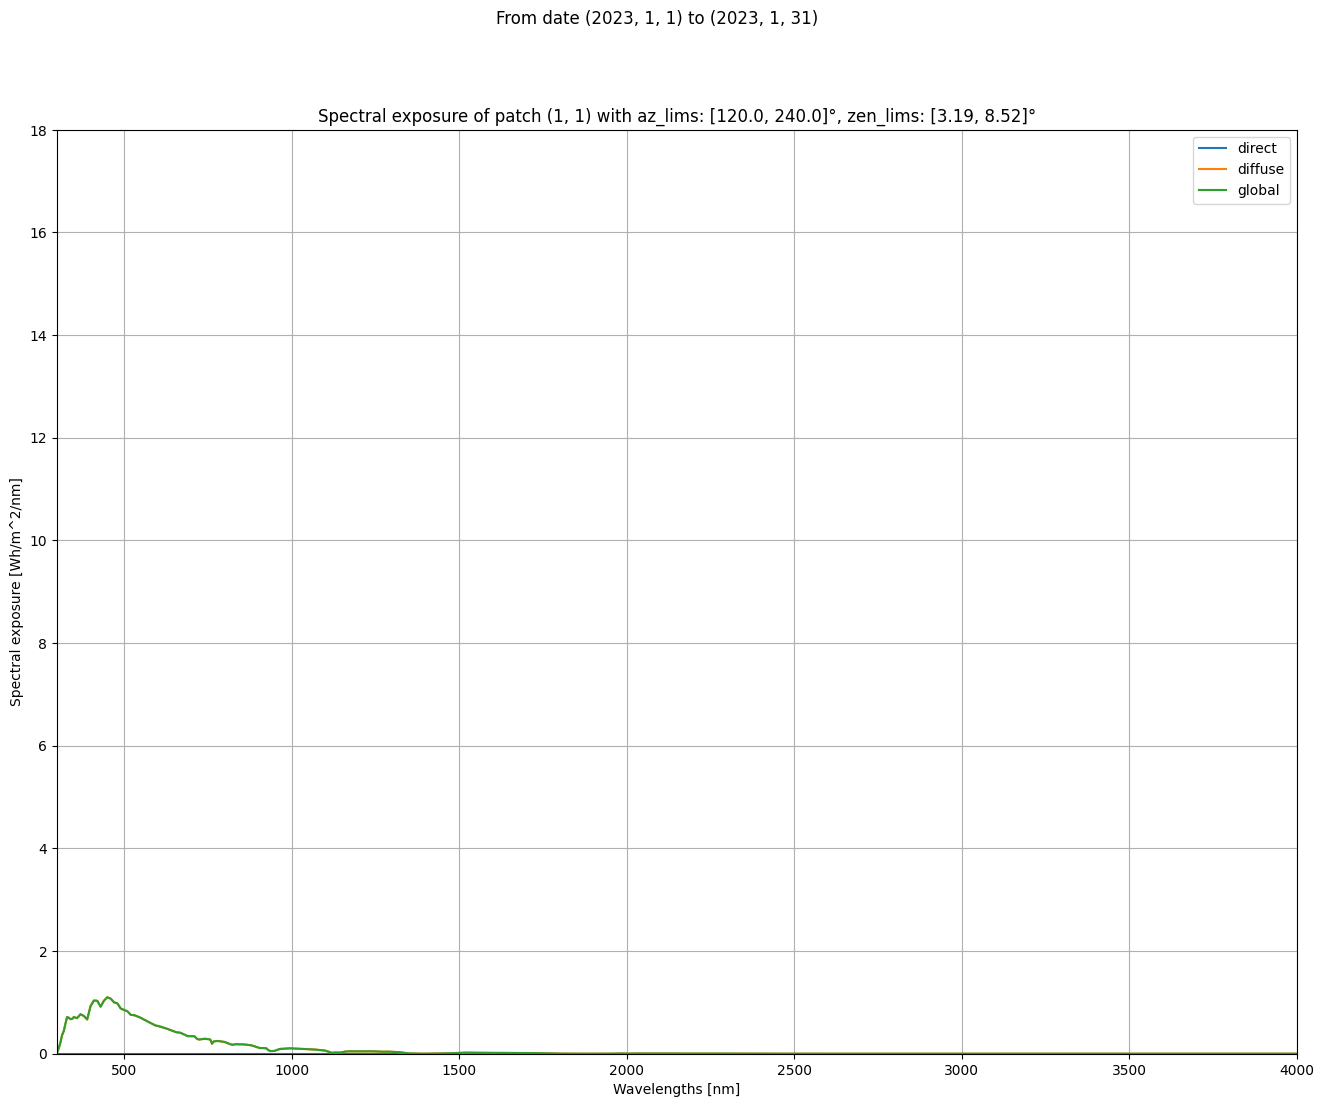

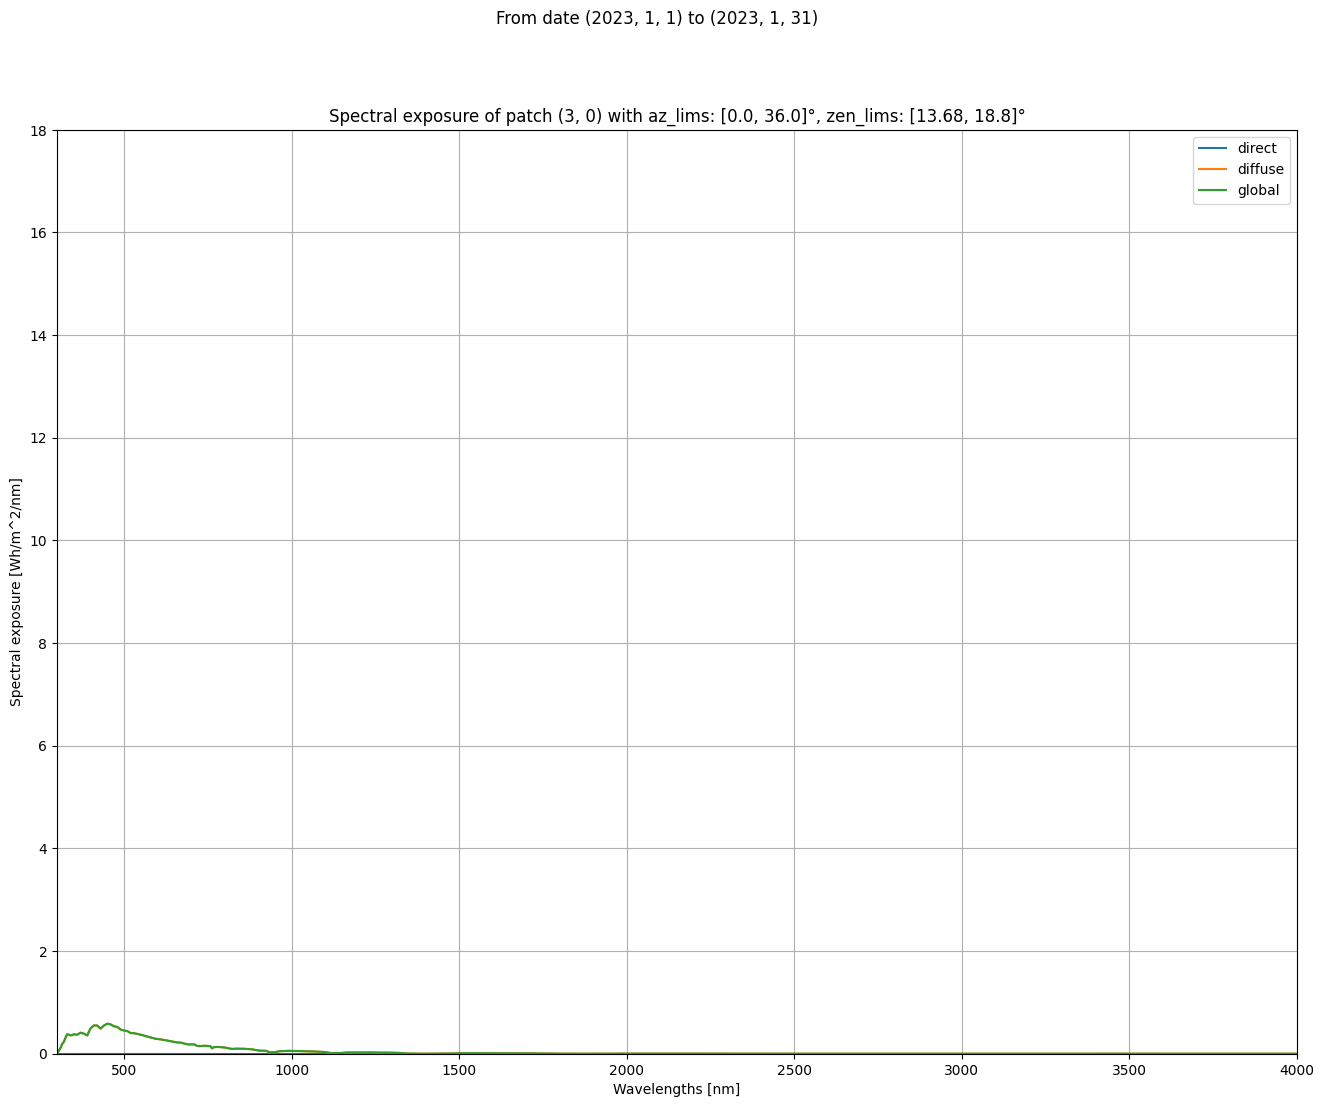

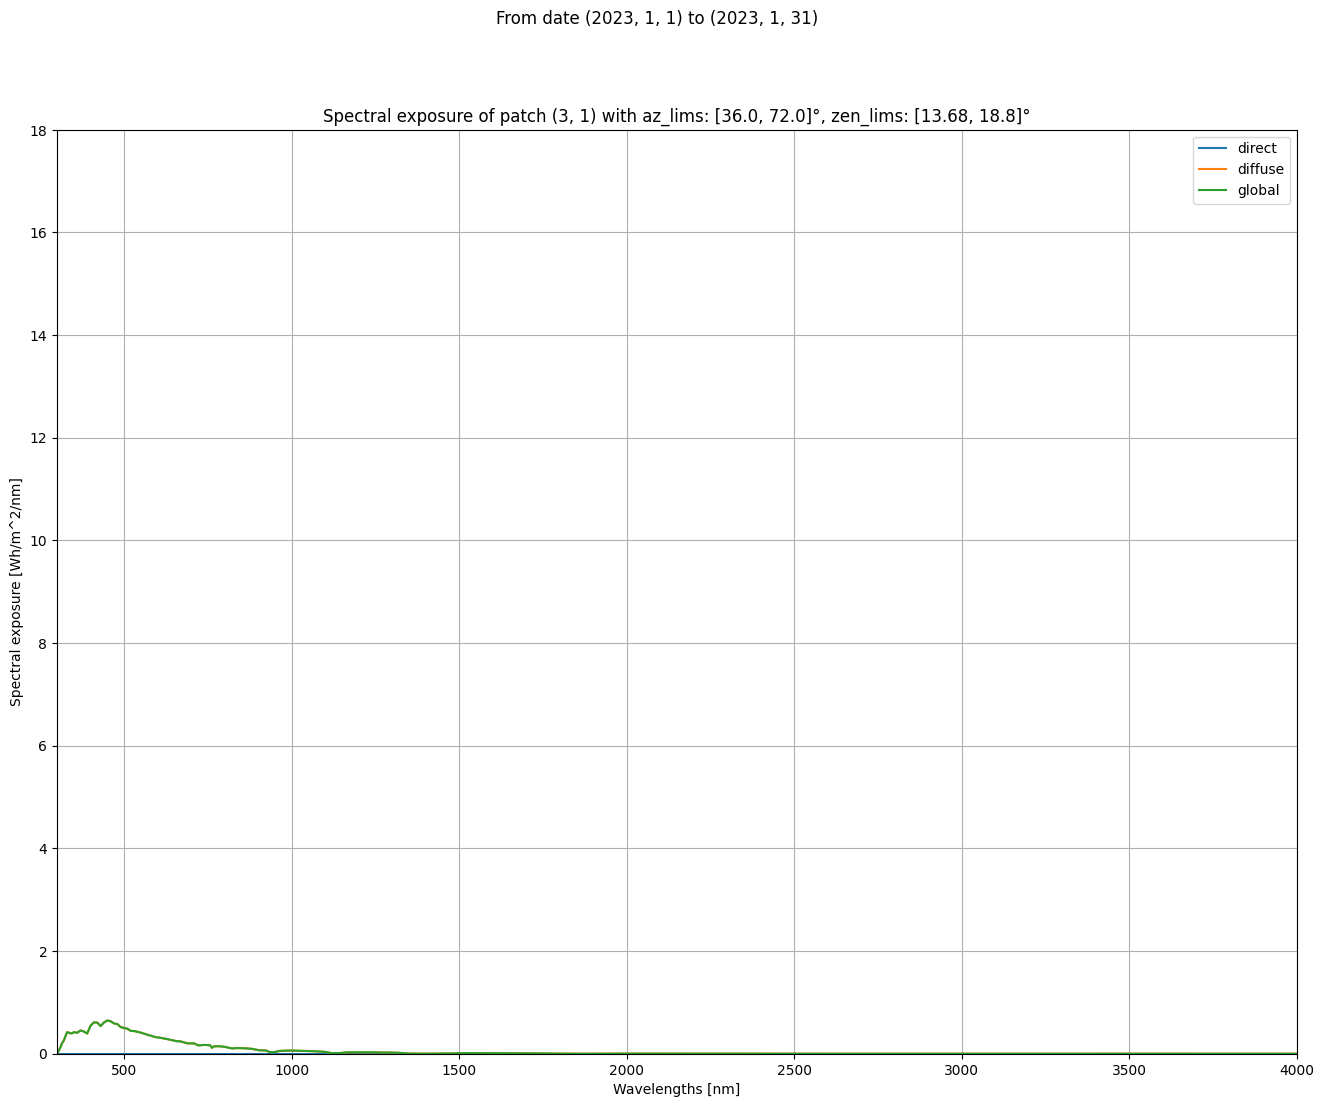

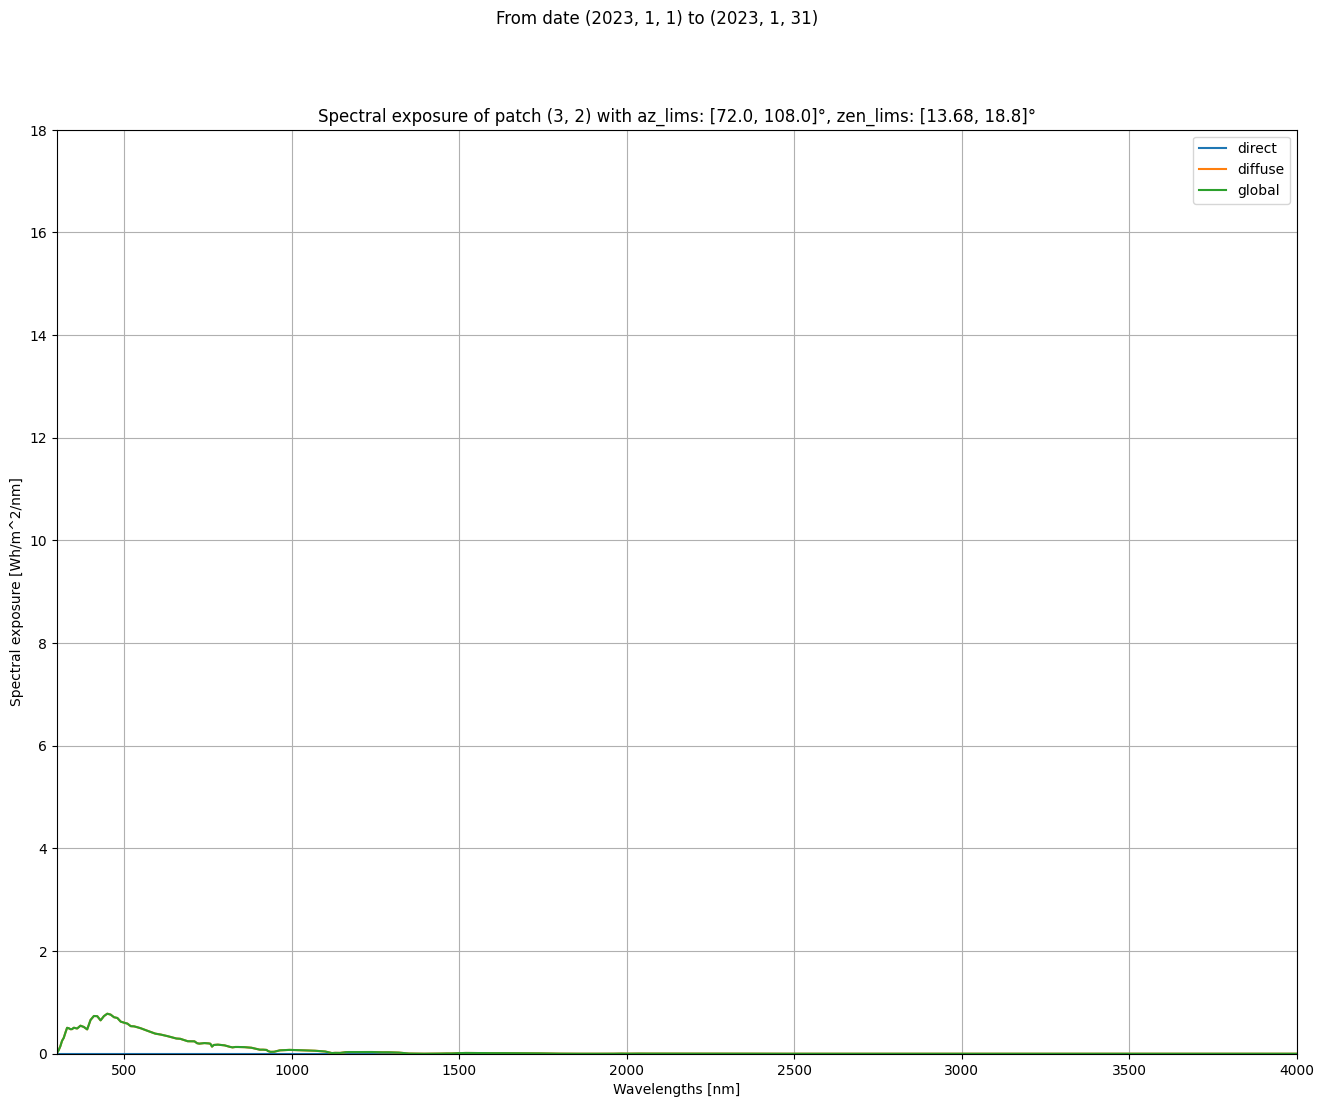

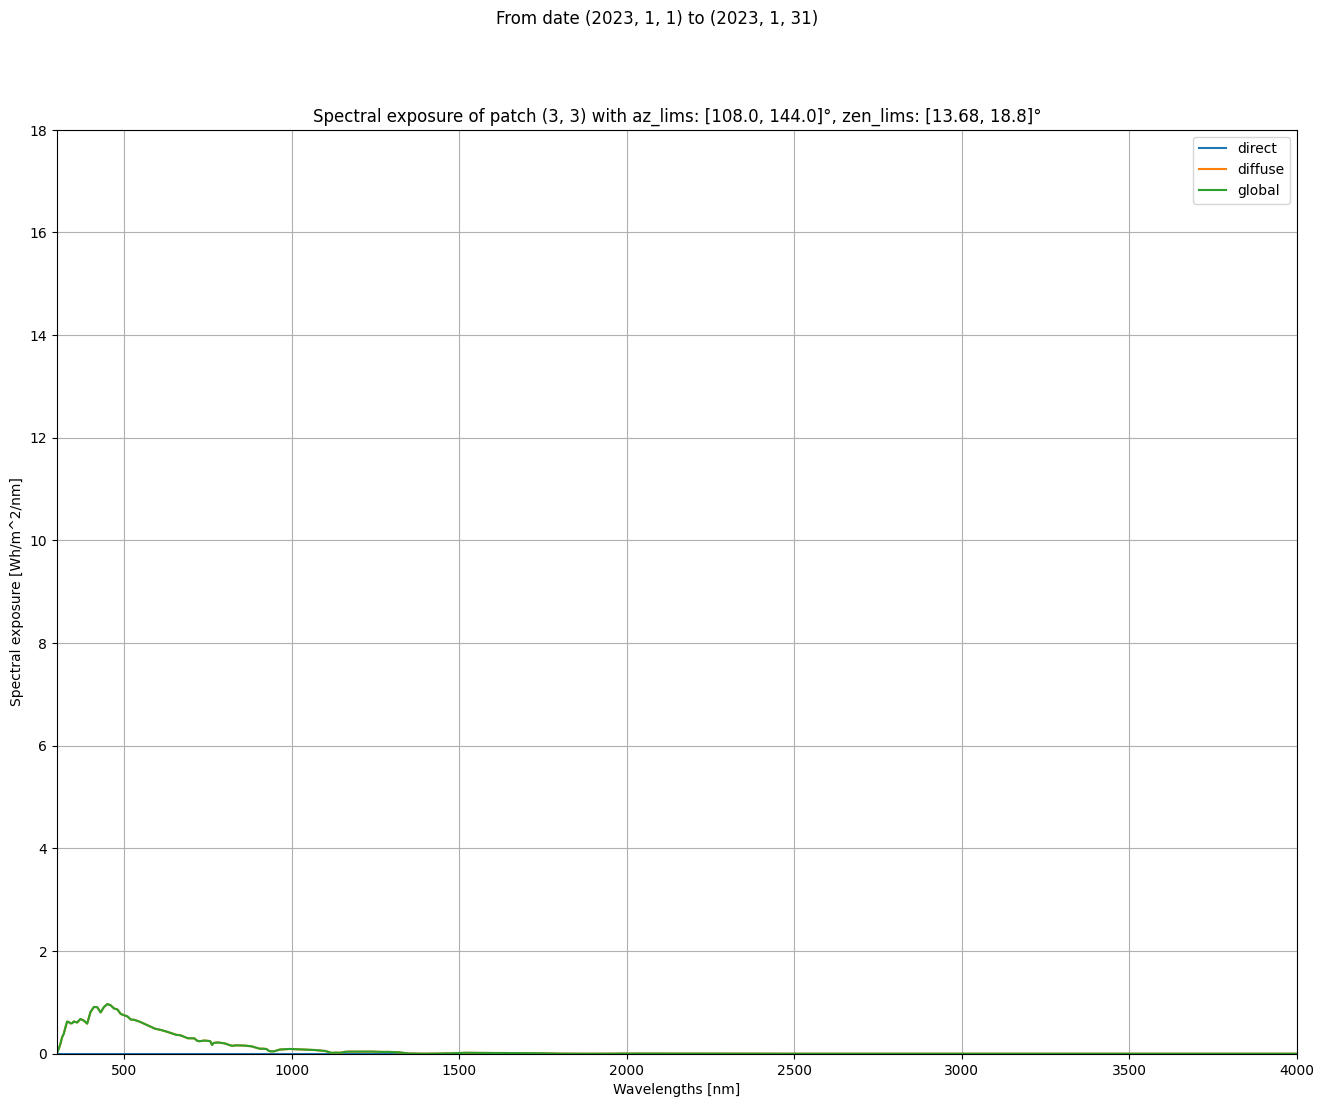

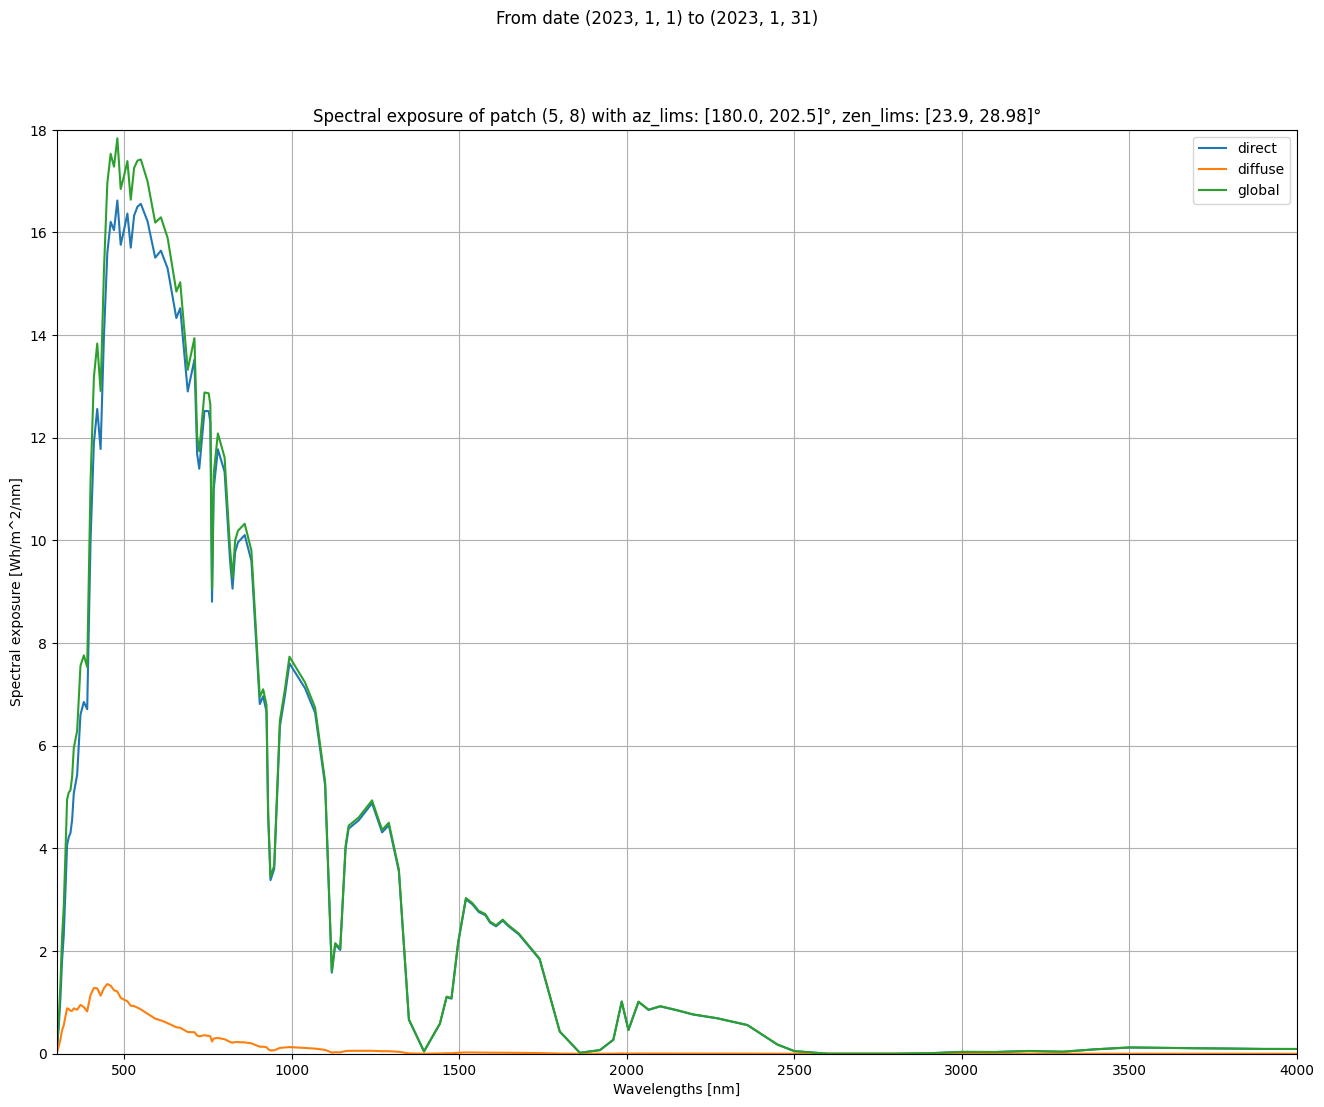

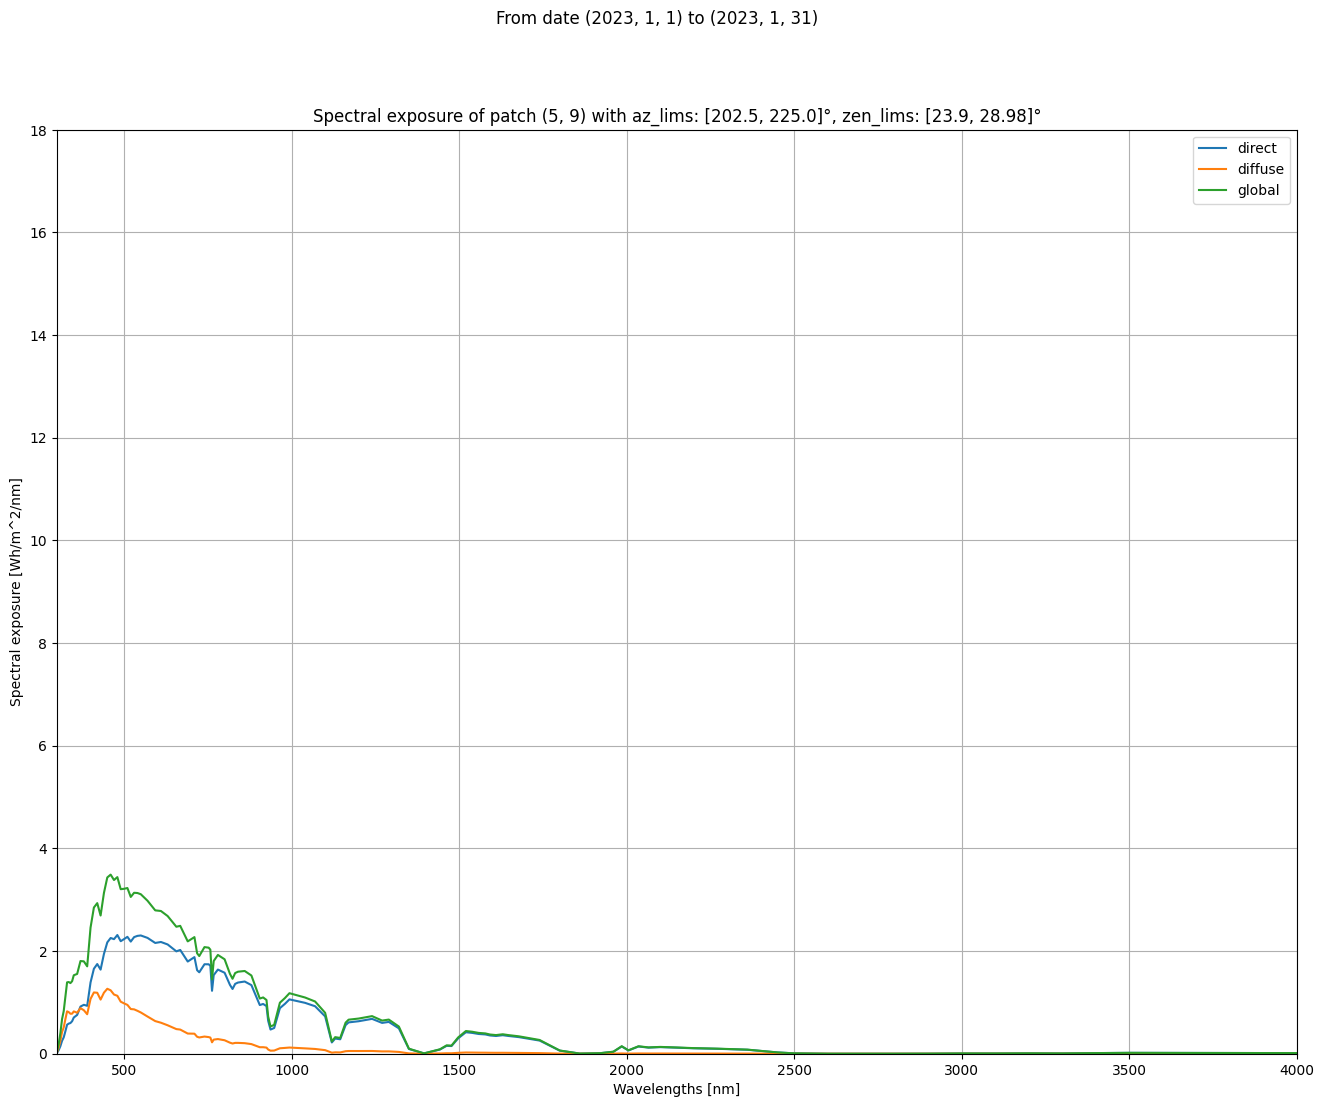

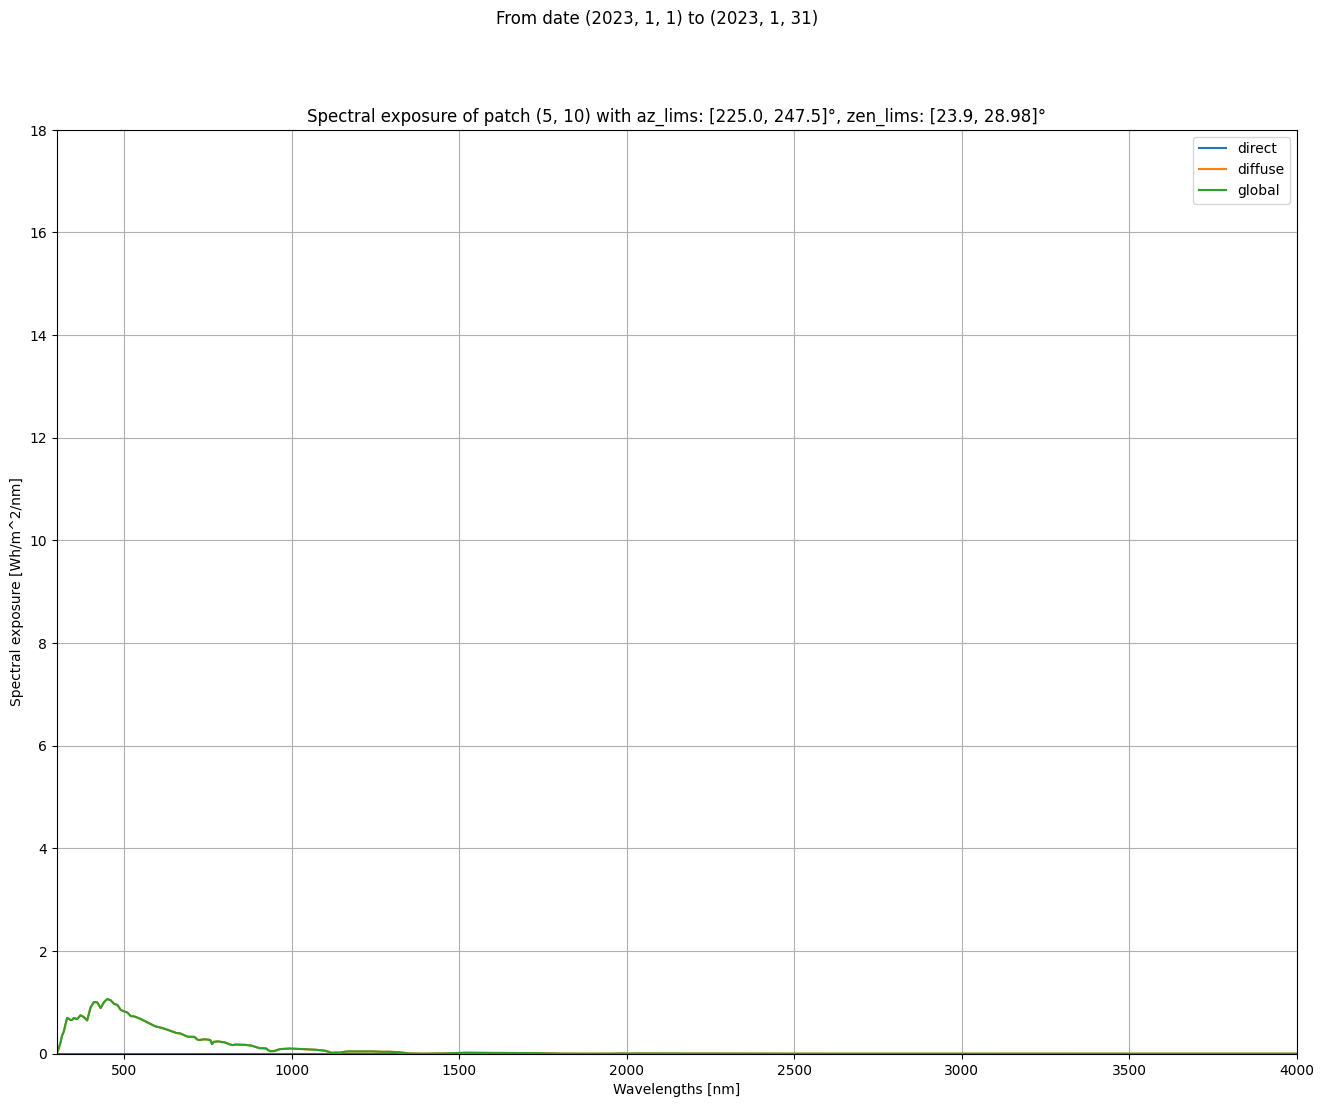

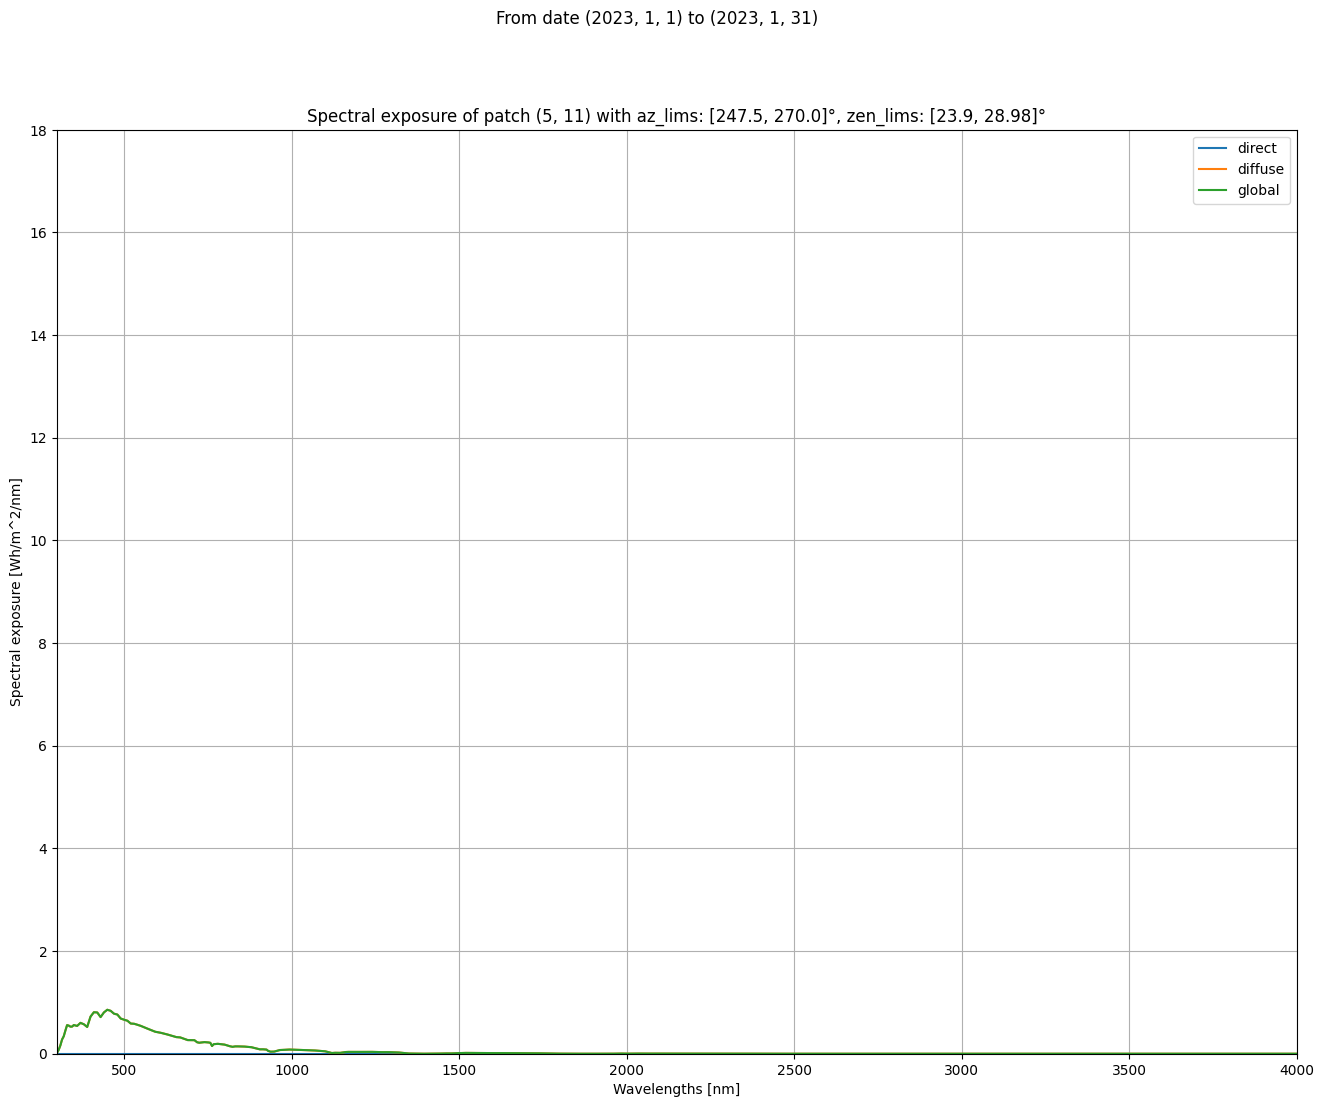

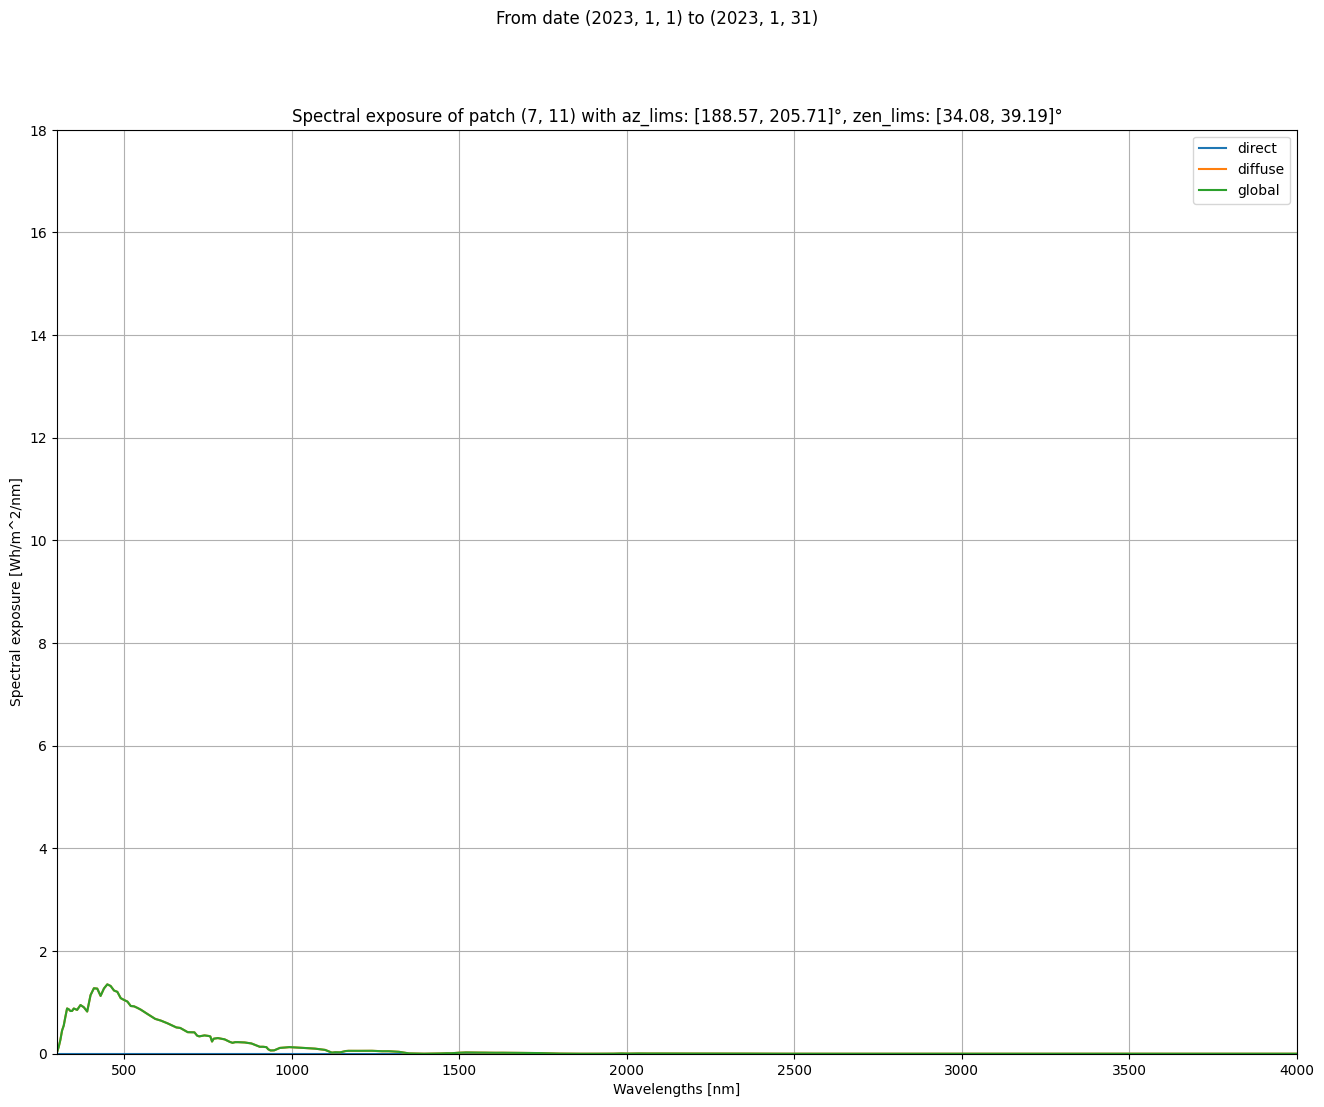

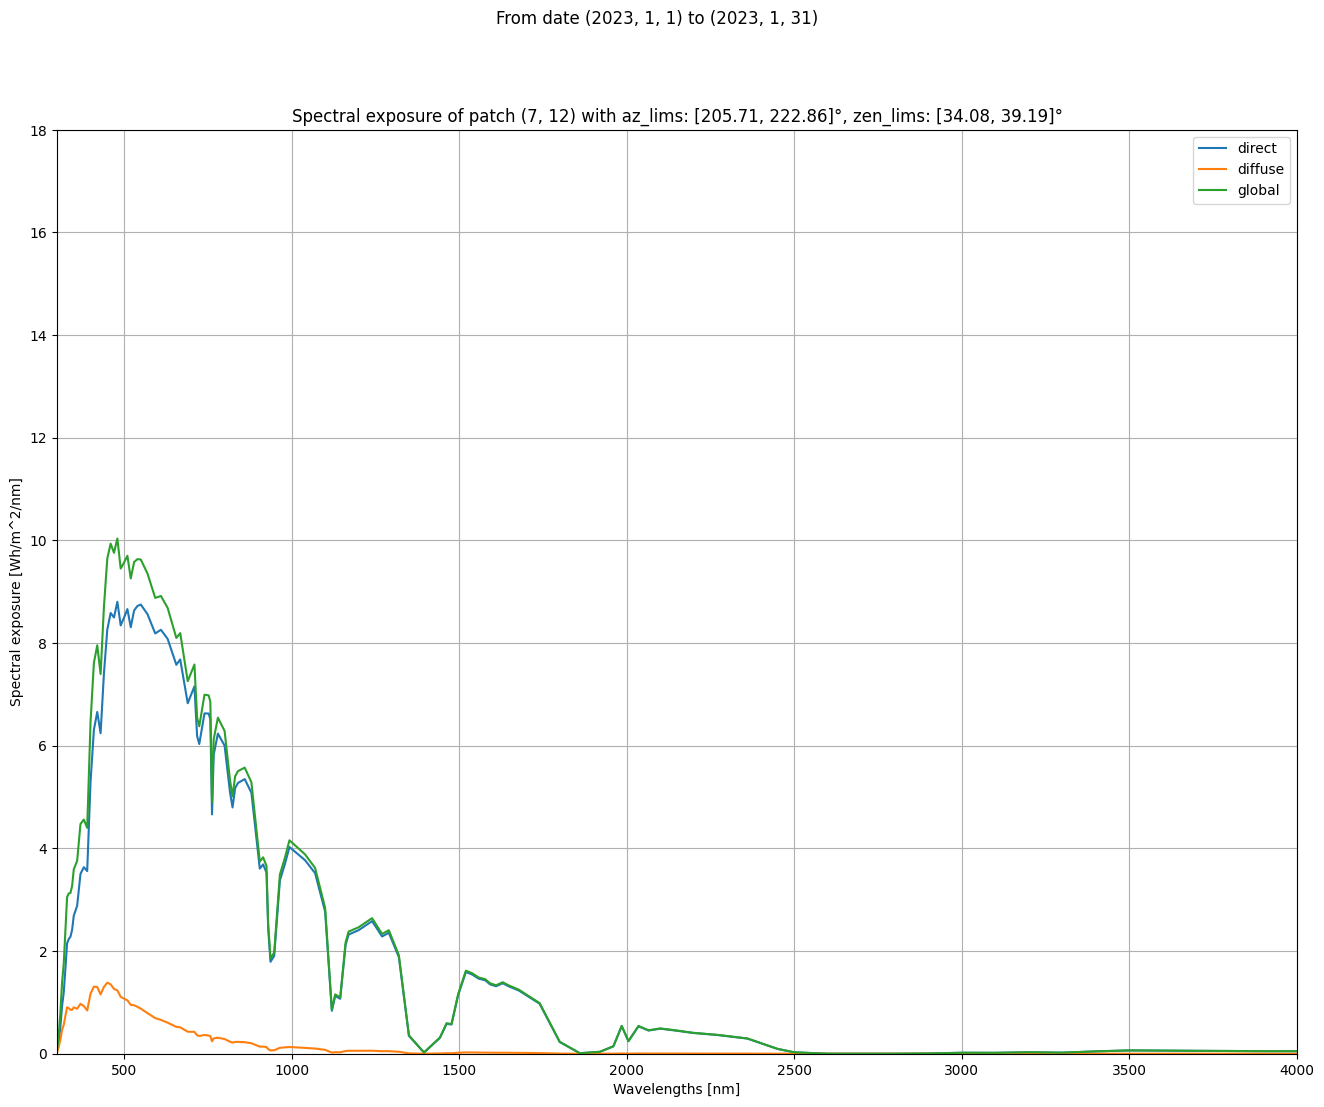

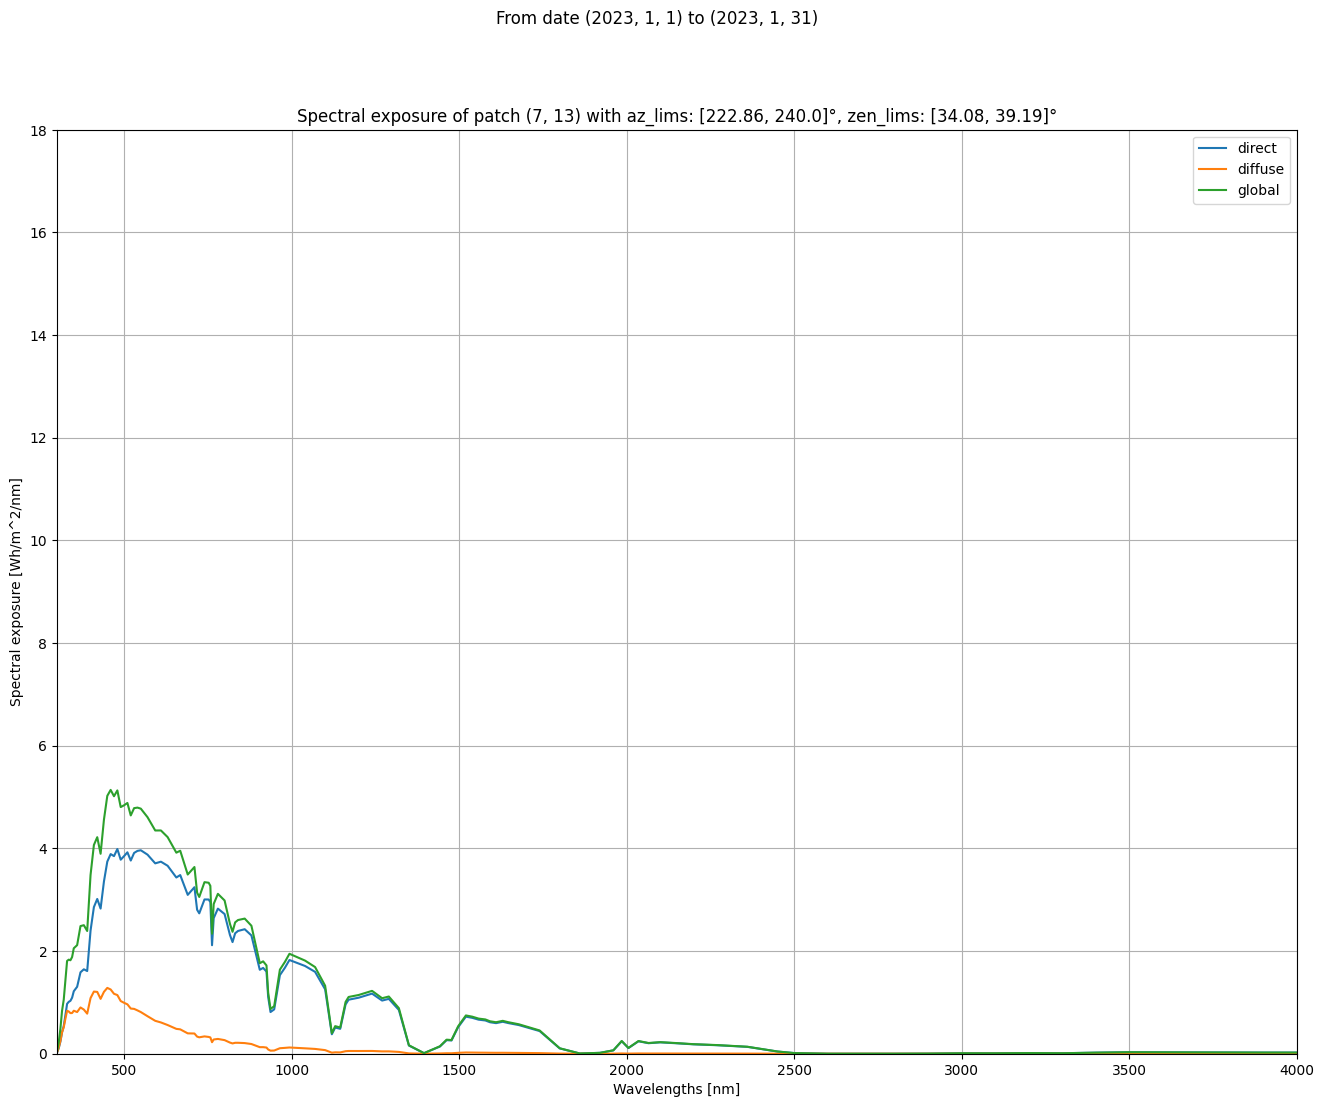

In [7]:
# We first delete the 'self.radiances' attribute in order to conserve memory space.
# Depending on your hardware this may or may not be necessary.
Sky_obj.radiances = None

# COMPUTE RADIANT EXPOSURE VECTORS (SPECRAL AND NOT SPECTRAL)
start_date = (2023, 1, 1)
end_date   = (2023, 1, 31)
Sky_obj.compute_exposure_vectors_for_a_date_interval( start_date  = start_date,
                                                        end_date    = end_date,
                                                        nel               = 46,
                                                        naz               = 181,
                                                        num_iterations    = 500,
                                                        use_site_horizon  = False,
                                                        int_nzen          = 20,
                                                        int_naz           = 30)

# (NOTE: the dates chosen must be present in 'Site_obj.simulation_time_data.keys()')

# The results can be found in 2 places:
# 1) 'self.exposure_vectors' attribute
# 2) 'self.patch_data["exposure"]' attribute

print("--- self.exposure_vectors KEYS ---")
print(Sky_obj.exposure_vectors.keys())

print("--- self.patch_data['exposure'] KEYS ---")
print(Sky_obj.patch_data[(5,1)]["exposure"].keys())

# If you whish to learn more about the specific contents of each dictionary, please
# see the documentation for the method "self.compute_exposure_vectors_for_a_date_interval".

# PLOT RADIANT EXPOSURE (VECTOR MAGNITUDE, NOT SPECTRAL) FOR ALL SKY-PATCHES
for projection in ["disk", "sphere"]:
    for mode in ["global", "direct", "diffuse"]:
        config = {"projection":projection, "mode":mode, "n":1000}
        Sky_obj.plot_exposures(config)


# PLOT RADIANT EXPOSURE (VECTOR MAGNITUDE, SPECTRAL) FOR SOME SKY PATCHES
wavelengths = Sky_obj.exposure_vectors["wavelengths"]
start_date  = Sky_obj.time_integrated_spectral_radiance["start_date"]
end_date    = Sky_obj.time_integrated_spectral_radiance["end_date"]

for key in [(0, 0), (1, 1), (3, 0), (3, 1), (3, 2), (3, 3), (5, 8), (5, 9), (5, 10), (5, 11), (7, 11), (7, 12), (7, 13)]:
    zone_num, patch_num = key
    direct_spectral_irrad_mag  = Sky_obj.patch_data[key]["exposure"]["spectral_direct"]["magnitude"]
    diffuse_spectral_irrad_mag = Sky_obj.patch_data[key]["exposure"]["spectral_diffuse"]["magnitude"]
    global_spectral_irrad_mag  = Sky_obj.patch_data[key]["exposure"]["spectral_global"]["magnitude"]

    az_lims  = [round(Sky_obj.patch_data[key]['inf_az'],2),  round(Sky_obj.patch_data[key]['sup_az'],2)]
    zen_lims = [round(Sky_obj.patch_data[key]['inf_zen'],2), round(Sky_obj.patch_data[key]['sup_zen'],2)]

    fig = plt.figure(figsize=(16,12))
    plt.plot(wavelengths, direct_spectral_irrad_mag,  label="direct")
    plt.plot(wavelengths, diffuse_spectral_irrad_mag, label="diffuse")
    plt.plot(wavelengths, global_spectral_irrad_mag,  label="global")
    plt.suptitle(f"From date {start_date} to {end_date}")
    plt.title(f"Spectral exposure of patch ({key[0]}, {key[1]}) with az_lims: {az_lims}°, zen_lims: {zen_lims}°")
    plt.ylabel("Spectral exposure [Wh/m^2/nm]")
    plt.xlabel("Wavelengths [nm]")
    plt.xlim(300, 4000)
    plt.ylim(0, 18)
    plt.grid()
    plt.legend()
    plt.show()

###     7) ABSORBED ENERGY
We can also compute the incident and absorbed energies for a unit plane, given an 
an absorption fucntion, for a given radiation component.

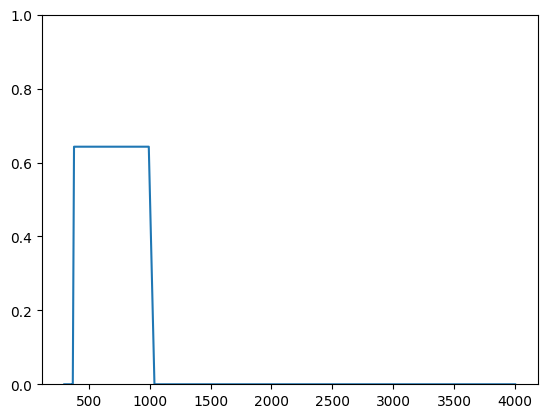

Total incident energy on unit horizontal plane: 179.8235130823509 kWh
Total absorbed incident energy on unit horizontal plane: 95.12443476397864 kWh


In [8]:
# DUMMY ABSORPTION FUNCTION FOR EXAMPLE
wavelengths = Sky_obj.exposure_vectors["wavelengths"]
func_array  = np.logical_and(375 <= wavelengths, wavelengths <= 1000).astype(float)
func        = interp1d(x = wavelengths, y = func_array, kind = "linear")

def absorption_func(arguments):
    cos_aoi = np.cos(np.deg2rad(arguments[:,0]))
    cos_aoi[cos_aoi<0] = 0
    return cos_aoi*func(arguments[:,1])


aoi = np.full(len(wavelengths), 50)
arguments = np.stack([aoi,wavelengths], axis=1)
res = absorption_func(arguments)
plt.plot(wavelengths, res, label = f"aoi = {aoi[0]}°")
plt.ylim(0,1)
plt.show()

# UNIT NORMAL OF PLANE TO EVALUATE
n_uvec=[0,0,1] # (horizontal plane in this case)

# COMPUTE INCIDENT ENERGY (ABSORPTION = 1, FOR EVERY WAVELENGTH)
total_incident_energy =\
Sky_obj.compute_absorbed_energy_by_unit_plane(n_uvec=n_uvec, absorption_func=1, component="global")

# COMPUTE INCIDENT ENERGY (ABSORPTION VARIES WITH WAVELENGTH)
total_absorbed_incident_energy =\
Sky_obj.compute_absorbed_energy_by_unit_plane(n_uvec=n_uvec, absorption_func=absorption_func, component="global")

print(f"Total incident energy on unit horizontal plane: {total_incident_energy/1000} kWh")
print(f"Total absorbed incident energy on unit horizontal plane: {total_absorbed_incident_energy/1000} kWh")

###     8) OPTIMAL ORIENTATION
Finally, we can find the plane orientation that maximizes energy absorption for a unit plane, given an 
an absorption fucntion, for a given radiation component. 

In [9]:
res =\
Sky_obj. compute_optimal_plane_orientation(absorption_func = 1, component = "global")
"""
res =\
Sky_obj. compute_optimal_plane_orientation(absorption_func = absorption_func, component = "global")
"""

print("--- OPTIMAL ORIENTATION RESULTS --- ")
print(res)

--- OPTIMAL ORIENTATION RESULTS --- 
{'energy': 208422.72627443934, 'az': 179.83397990969368, 'zen': 32.109434537418075, 'n_uvec': [-0.5315358311644897, 0.0015401810467349133, 0.8470344078197877], 'el': 57.890565462581925, 'az_res': 8.26908594968082e-08, 'el_res': 0.3468305983166518}
